Introduction:
It is clear that cars are a significant part of many people’s lives, and it is not a rare situation that someone decides to buy or sell car but no one fully understands all the factors that influence the most important part - the price he should sell/buy car. For example, most people know some basic things like if car is almost new, there is a high chance that it will be more expensive, if the mileage is big, it will decrease the price of car and etc. But the relationships between all of these factos are not so clear. Someone might think that engine type and brand are the most crucial price determiners. However, this assumption might be false when we consider some underpowered or fragile but antique cars that are sold for millions of dollars. It is obvious that price of car is shaped by multiple factors and 1 main determinant does not exist. In this project, I aim to create a model that will help people to determine the optimal price for any car. With help of such tools as Pandas, Matplotlib, Numpy and Seaborn, I will deeply analyze data

Firsly, I would like to tell about each aspect I have information about in my dataset:
    Brand:
The brand refers to the mark of a car, such as Ferrari, Volvo, Lexus, etc. It represents the manufacturer or company that produces the vehicle.
    Name:
The name corresponds to the specific model of car brand, such as Tahoe Premier, Ghost, etc.
    Drivetrain:
Provides information about how a vehicle delivers power from its engine to the wheels - four-wheel drive, all-wheel drive etc
    Exterior color:
Provides information about the color of the vehicle’s exterior paint
    Interior color:
Provides information about the color of the vehicle’s interior paint
    Fuel Type:
Specifies the type of fuel the vehicle uses for its movement, such as gasoline, electric, hybrid, etc.
    Year:
Shows the year when vehicle was produced.
    VIN:
Provides the Vehicle Identification Number, a unique code assigned to every vehicle during manufacturing. 
    Mileage:
Shows to the total distance the vehicle has traveled, measured in miles.
    Transmission:
Shows the type of transmission system in the vehicle, for example, automatic or manual.
    Price:
Shows the cost of the vehicle.
    Engine technologies:
Gives the information about technologies used while making engine(GDI, OHV, MPFI etc).
    Engine Characteristics:
Shows the total volume and number of all the cylinders in the engine. It is  measured in liters and provides information about the engine's size.
    Source:
The link that directs to the website from which the information about car was taken
    TimeStamp:
Time when the information about the car was put into the dataset.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

Lets import our dataset

In [51]:
df = pd.read_csv("/Users/leonkul/Downloads/car_data_04-30-2023--105242 (3).csv")
stats = df[['Car Name', 'Car Price', 'Car Mileage', 'Exterior Color', 'Interior Color', 'Drivetrain','Fuel Type', 'Transmission', 'Engine', 'VIN', 'TimeStamp', 'Source']].describe()

Now we should do some data clean-up
We can notice that in columns like "Car Price" and "Car Mileage" data is given in inconsistent way, like 10 mi. or $33,455. Lets change this

In column Car Price lets delete '$' sign, change ',' to '.', transform it to numeric type and multiply by 1000 so we have a number of dollars and nothing else. Also lets delete all NaN rows where the price is not determined

Lets take a look at the structure of the dataset

In [52]:
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,TimeStamp,Source
0,2022 RAM 1500 Limited,"$69,855",801 mi.,Bright White Clearcoat,Black,Four-wheel Drive,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6SRFHT3NN453854,2023-04-30 10:52:45.308626,Cars.com
1,2023 Honda Accord Hybrid Sport,"$33,445",10 mi.,Urban Gray,Black,Front-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,1HGCY2F57PA005190,2023-04-30 10:52:47.389010,Cars.com
2,2023 Honda CR-V Hybrid Sport Touring,"$39,845",10 mi.,Meteorite Gray Metallic,–,All-wheel Drive,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H9XPH801720,2023-04-30 10:52:51.919237,Cars.com
3,2023 Toyota Highlander L,"$39,093",–,Wind Chill Pearl,Graphite,Front-wheel Drive,Gasoline,Automatic,2.4L I4 16V PDI DOHC Turbo,5TDKDRAHXPS032970,2023-04-30 10:52:56.101260,Cars.com
4,2023 GMC Canyon 4WD Elevation,"$44,320",3 mi.,Summit White,Jet Black,Four-wheel Drive,Gasoline,Automatic,Turbocharged Gas I4 2.7L/,1GTP6BEK1P1131378,2023-04-30 10:52:59.654956,Cars.com
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,2023 Toyota GR Corolla Core,"$44,559",–,White,Red,AWD,Gasoline,Manual,3 Cylinder,JTNABAAE5PA003961,2023-04-30 12:44:22.090842,Cars.com
1995,2018 Porsche Macan S,"$42,059","39,895 mi.",Black,Black,All-wheel Drive,Gasoline,7-Speed Automatic with Auto-Shift,3.0L V6 24V GDI DOHC Twin Turbo,WP1AB2A54JLB38868,2023-04-30 12:44:24.804439,Cars.com
1996,2023 Toyota Tundra Platinum,"$66,878",5 mi.,Midnight Black Metallic,Black,Four-wheel Drive,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,5TFNA5DB4PX094221,2023-04-30 12:44:28.616016,Cars.com
1997,2023 Ford F-150 Platinum,"$71,220",–,Rapid Red Metallic Tinted Clearcoat,Black,Four-wheel Drive,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTFW1E8XPFB34339,2023-04-30 12:44:32.632184,Cars.com


In [53]:
df['Car Price'] = df['Car Price'].str.replace('$', '', regex=False)
df['Car Price'] = df['Car Price'].str.replace(',', '.', regex=False)
df['Car Price'] = pd.to_numeric(df['Car Price'], errors='coerce')
df['Car Price'] = df['Car Price'] * 1000
df['Car Price'] = pd.to_numeric(df['Car Price'], errors='coerce')
print(df['Car Price'])

0       69855.0
1       33445.0
2       39845.0
3       39093.0
4       44320.0
         ...   
1994    44559.0
1995    42059.0
1996    66878.0
1997    71220.0
1998    29995.0
Name: Car Price, Length: 1999, dtype: float64


Now lets do the same thing to the "Car Mileage" column. Lets remove the 'mi.' and change ',' to '', transform it to numeric type so we have a number of miles and nothing else. Also lets delete all rows where car mileage is not determined

In [54]:
df['Car Mileage'] = df['Car Mileage'].str.replace(' mi.', '', regex=False) 
df['Car Mileage'] = df['Car Mileage'].str.replace(',', '', regex=False)    
df['Car Mileage'] = pd.to_numeric(df['Car Mileage'], errors='coerce')       

df = df.dropna(subset=['Car Mileage'])

print(df['Car Mileage'])        

0         801.0
1          10.0
2          10.0
4           3.0
5          18.0
         ...   
1992    18426.0
1993        5.0
1995    39895.0
1996        5.0
1998    64151.0
Name: Car Mileage, Length: 1823, dtype: float64


Lets analogically delete some rows where 1 important detail is undetermined(Drivetrain, Fuel Type, Transmission, Engine) I have checked that there no rows with undetermined Car Name, VIN, TimeStamp or source but we will still check it with code

In [55]:
df = df[df['Car Name'] != '–']
df = df[df['Drivetrain'] != '–']
df = df[df['Fuel Type'] != '–']
df = df[df['Transmission'] != '–']
df = df[df['Engine'] != '–']
df = df[df['VIN'] != '–']
df = df[df['TimeStamp'] != '–']
df = df[df['Source'] != '–']

When we finished with "cleaning" data up it is time to get descriptive statistics. We need descriptive statistics of at least 3 numerical fields but we have only 2 right now. We can do data transformation and add 3 new columns. First of all, lets extract the year of production of the car and Car Brandfrom the column "Car Name"

In [56]:
df['Year of Production'] = df['Car Name'].str.extract(r'^(\d{4})')
df['Car Name'] = df['Car Name'].str.replace(r'^\d{4}\s+', '', regex=True)
df['Year of Production'] = pd.to_numeric(df['Year of Production'], errors='coerce')
df['Year of Production'] = df['Year of Production'].astype(int)
df['Car Brand'] = df['Car Name'].str.split().str[0]
print(df[['Car Name', 'Year of Production', 'Car Brand']])

                             Car Name  Year of Production   Car Brand
0                    RAM 1500 Limited                2022         RAM
1           Honda Accord Hybrid Sport                2023       Honda
2     Honda CR-V Hybrid Sport Touring                2023       Honda
4            GMC Canyon 4WD Elevation                2023         GMC
5                 Kia Sportage X-Line                2023         Kia
...                               ...                 ...         ...
1992         Volkswagen Atlas 2.0T SE                2022  Volkswagen
1993                  Kia Stinger GT2                2023         Kia
1995                  Porsche Macan S                2018     Porsche
1996           Toyota Tundra Platinum                2023      Toyota
1998            Toyota Highlander XLE                2018      Toyota

[1778 rows x 3 columns]


Lets also create a column with the 

Now Lets create a column where will be the engine volume in litres(0 if car is electric) and remove rows if there is no information about engine volume(for example just V6 or 8-cylinder). We can extract this number from the "Engine" column

In [57]:
df['Engine Volume'] = df['Engine'].str.extract(r'(\d+\.\d+)\s*[Ll]')
df['Engine Volume'] = df['Engine Volume'].fillna(0)
df = df[~((df['Engine Volume'] == 0) & (~df['Engine'].str.contains('Electric', case=False, na=False)))]
df['Engine Volume'] = df['Engine Volume'].astype(float)
print(df[['Engine', 'Engine Volume']])


                               Engine  Engine Volume
0                5.7L V8 16V MPFI OHV            5.7
1         2.0L I4 16V GDI DOHC Hybrid            2.0
2         2.0L I4 16V GDI DOHC Hybrid            2.0
4           Turbocharged Gas I4 2.7L/            2.7
5                2.5L I4 16V PDI DOHC            2.5
...                               ...            ...
1992       2.0L I4 16V GDI DOHC Turbo            2.0
1993  3.3L V6 24V GDI DOHC Twin Turbo            3.3
1995  3.0L V6 24V GDI DOHC Twin Turbo            3.0
1996  3.5L V6 24V PDI DOHC Twin Turbo            3.5
1998             3.5L V6 24V PDI DOHC            3.5

[1742 rows x 2 columns]


Now we have even 4 numerical fields. Before getting descriptive statistics lets add plots for all these fields.

1. The bar chart that shows the number and percentage of cars produced in each year

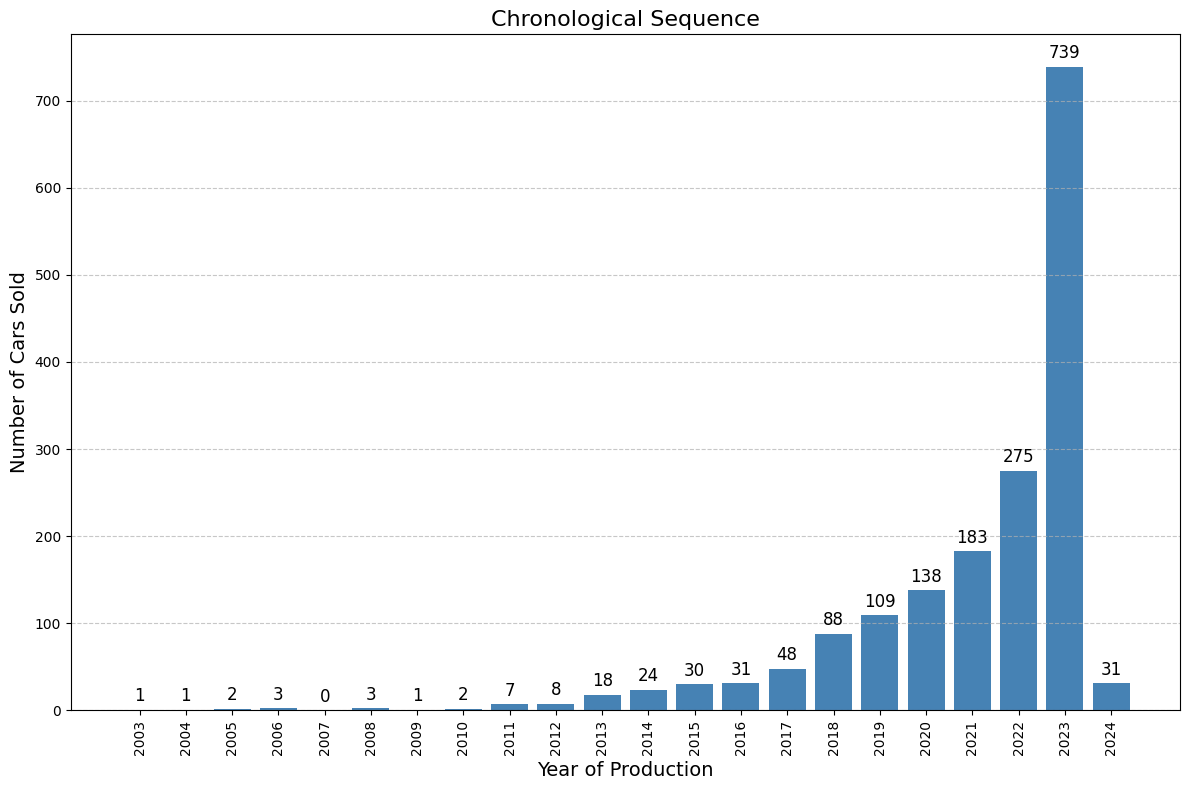

In [58]:
all_years = range(df['Year of Production'].min(), df['Year of Production'].max() + 1)
year_counts = df['Year of Production'].value_counts().reindex(all_years, fill_value=0).sort_index(ascending=False)

plt.figure(figsize=(12, 8))
bars = plt.bar(year_counts.index, year_counts.values, color='steelblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, str(int(yval)), ha='center', va='bottom', fontsize=12)


plt.title('Chronological Sequence', fontsize=16)
plt.xlabel('Year of Production', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)


plt.xticks(ticks=year_counts.index, labels=year_counts.index, fontsize=10, rotation=90)


plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показ графика
plt.show()

2. The pie chat that shows the number and percentage of price diapazone of sold cars:

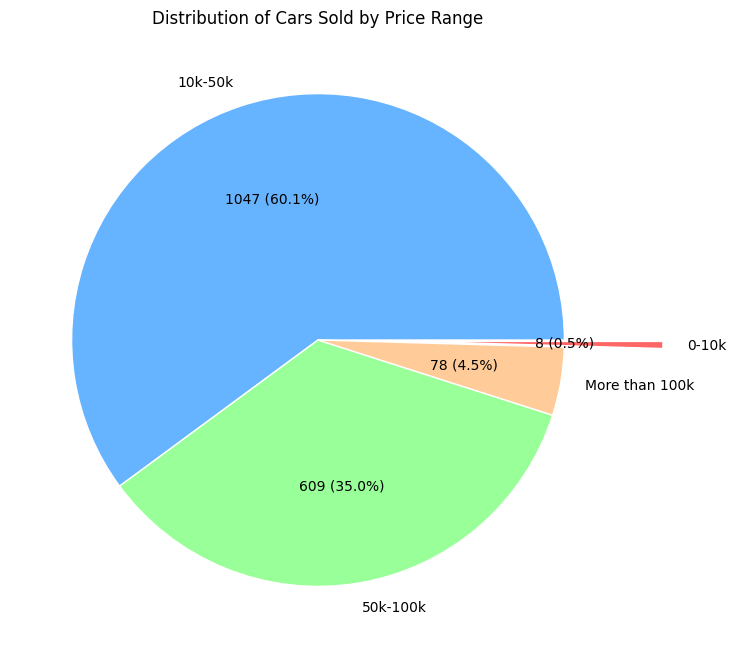

In [59]:
bins = [0, 10000, 50000, 100000, 10000000]
labels = ['0-10k', '10k-50k', '50k-100k', 'More than 100k']

df['Price Range'] = pd.cut(df['Car Price'], bins=bins, labels=labels, right=False)

price_counts = df['Price Range'].value_counts()

def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals)) 
    return f"{absolute} ({pct:.1f}%)" 

explode = (0.0, 0.0, 0.0, 0.4) 


plt.figure(figsize=(8, 8))


plt.pie(price_counts, labels=price_counts.index, autopct=lambda pct: func(pct, price_counts), 
        colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff6666'], 
        explode=explode, wedgeprops={'edgecolor': 'white'}) 


plt.title('Distribution of Cars Sold by Price Range')


plt.show()

3. Combo chart(bar chart and line chart) that show the number and percentage of cars depending on their 

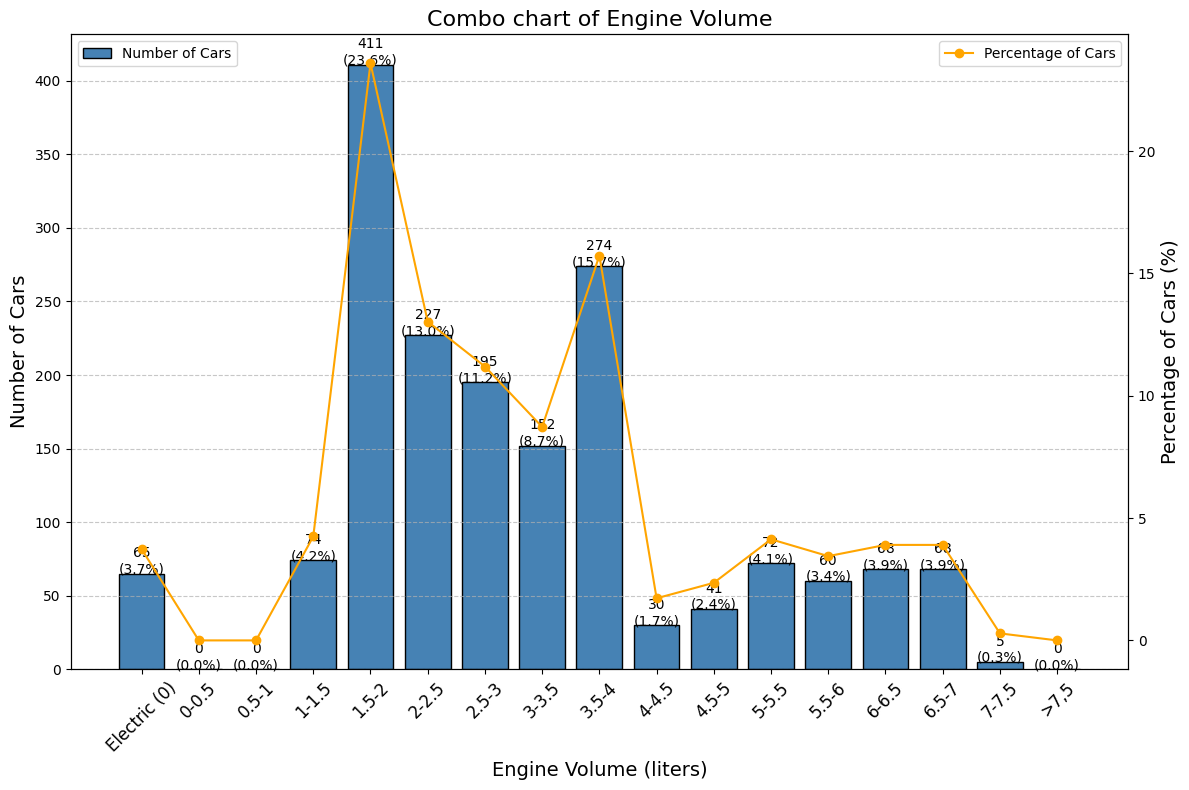

In [60]:

bins = [-0.1, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]
bin_labels = [
    'Electric (0)', '0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3',
    '3-3.5', '3.5-4', '4-4.5', '4.5-5', '5-5.5', '5.5-6', '6-6.5', '6.5-7', '7-7.5', '>7,5'
]


hist, edges = pd.cut(df['Engine Volume'], bins=bins, labels=bin_labels, include_lowest=True, retbins=True)
bin_counts = hist.value_counts(sort=False)


total_count = len(df)
percentages = (bin_counts / total_count) * 100


fig, ax1 = plt.subplots(figsize=(12, 8))


bars = ax1.bar(bin_labels, bin_counts, color='steelblue', edgecolor='black', width=0.8, label='Number of Cars')
ax1.set_xlabel('Engine Volume (liters)', fontsize=14)
ax1.set_ylabel('Number of Cars', fontsize=14)
ax1.set_title('Combo chart of Engine Volume', fontsize=16)
ax1.set_xticks(range(len(bin_labels)))
ax1.set_xticklabels(bin_labels, rotation=45, fontsize=12)


ax2 = ax1.twinx()
ax2.plot(range(len(bin_labels)), percentages, color='orange', marker='o', label='Percentage of Cars')
ax2.set_ylabel('Percentage of Cars (%)', fontsize=14)


for i, (count, pct) in enumerate(zip(bin_counts, percentages)):
    ax1.text(i, count-0.00000001, f"{int(count)}\n({pct:.1f}%)", ha='center', fontsize=10)


ax1.grid(axis='y', linestyle='--', alpha=0.7)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Scatter plot that shows the connection betweeen the car price and car mileage. The information from this scatter plot will be later used in my hypothesis proof.

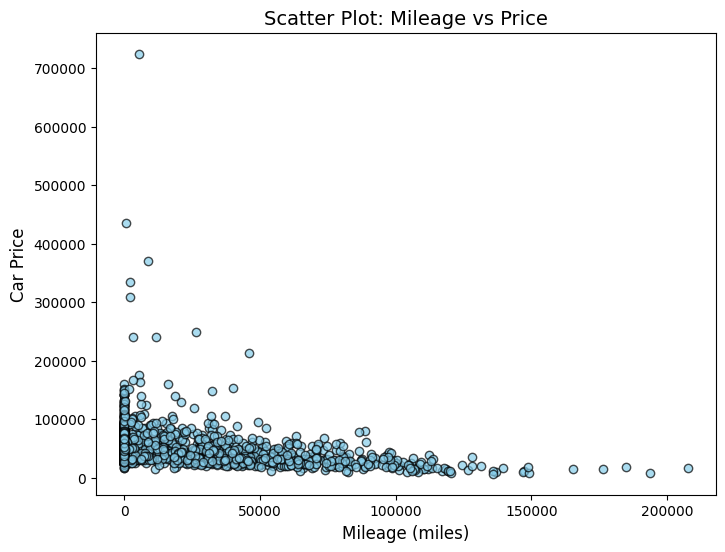

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Car Mileage'], df['Car Price'], color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Mileage (miles)', fontsize=12)
plt.ylabel('Car Price', fontsize=12)
plt.title('Scatter Plot: Mileage vs Price', fontsize=14)

plt.show()

Just so we do not have some mistakes or typos lets reset the index after removing rows so we do not have some "holes" in our data

In [62]:
df.reset_index(drop=True, inplace=True)

Now we can move to descriptive statistics. We will include mean, min, max, median and standard deviation of the fields. 

1. First of all lets find descriptive statistics of the car price. For this lets sort out the car price from minimum to maximum

In [63]:
df.sort_values(by='Car Price', ascending=True, inplace=True)
descriptive_stats = df['Car Price'].describe()
print(descriptive_stats)
print('median value: ', df['Car Price'].median())

count      1742.000000
mean      50814.106774
std       34033.172016
min        6999.000000
25%       32411.250000
50%       44735.000000
75%       60430.250000
max      724900.000000
Name: Car Price, dtype: float64
median value:  44735.0


2. Now lets find descriptive statistics of the engine volume. For this lets sort out the engine volume from minimum to maximum

In [64]:
df.sort_values(by='Engine Volume', ascending=True, inplace=True)
descriptive_stats = df['Engine Volume'].describe()
print(descriptive_stats)
print('median value: ', df['Engine Volume'].median())

count    1742.000000
mean        3.185362
std         1.544800
min         0.000000
25%         2.000000
50%         3.000000
75%         3.800000
max         7.300000
Name: Engine Volume, dtype: float64
median value:  3.0


3. Now lets find descriptive statistics of the car mileage. For this lets sort out the car mileage from minimum to maximum

In [65]:
df.sort_values(by='Car Mileage', ascending=True, inplace=True)
descriptive_stats = df['Car Mileage'].describe()
print(descriptive_stats)
print('median value: ', df['Car Mileage'].median())

count      1742.000000
mean      21104.180827
std       31054.058316
min           0.000000
25%           7.000000
50%        2975.500000
75%       33612.000000
max      207610.000000
Name: Car Mileage, dtype: float64
median value:  2975.5


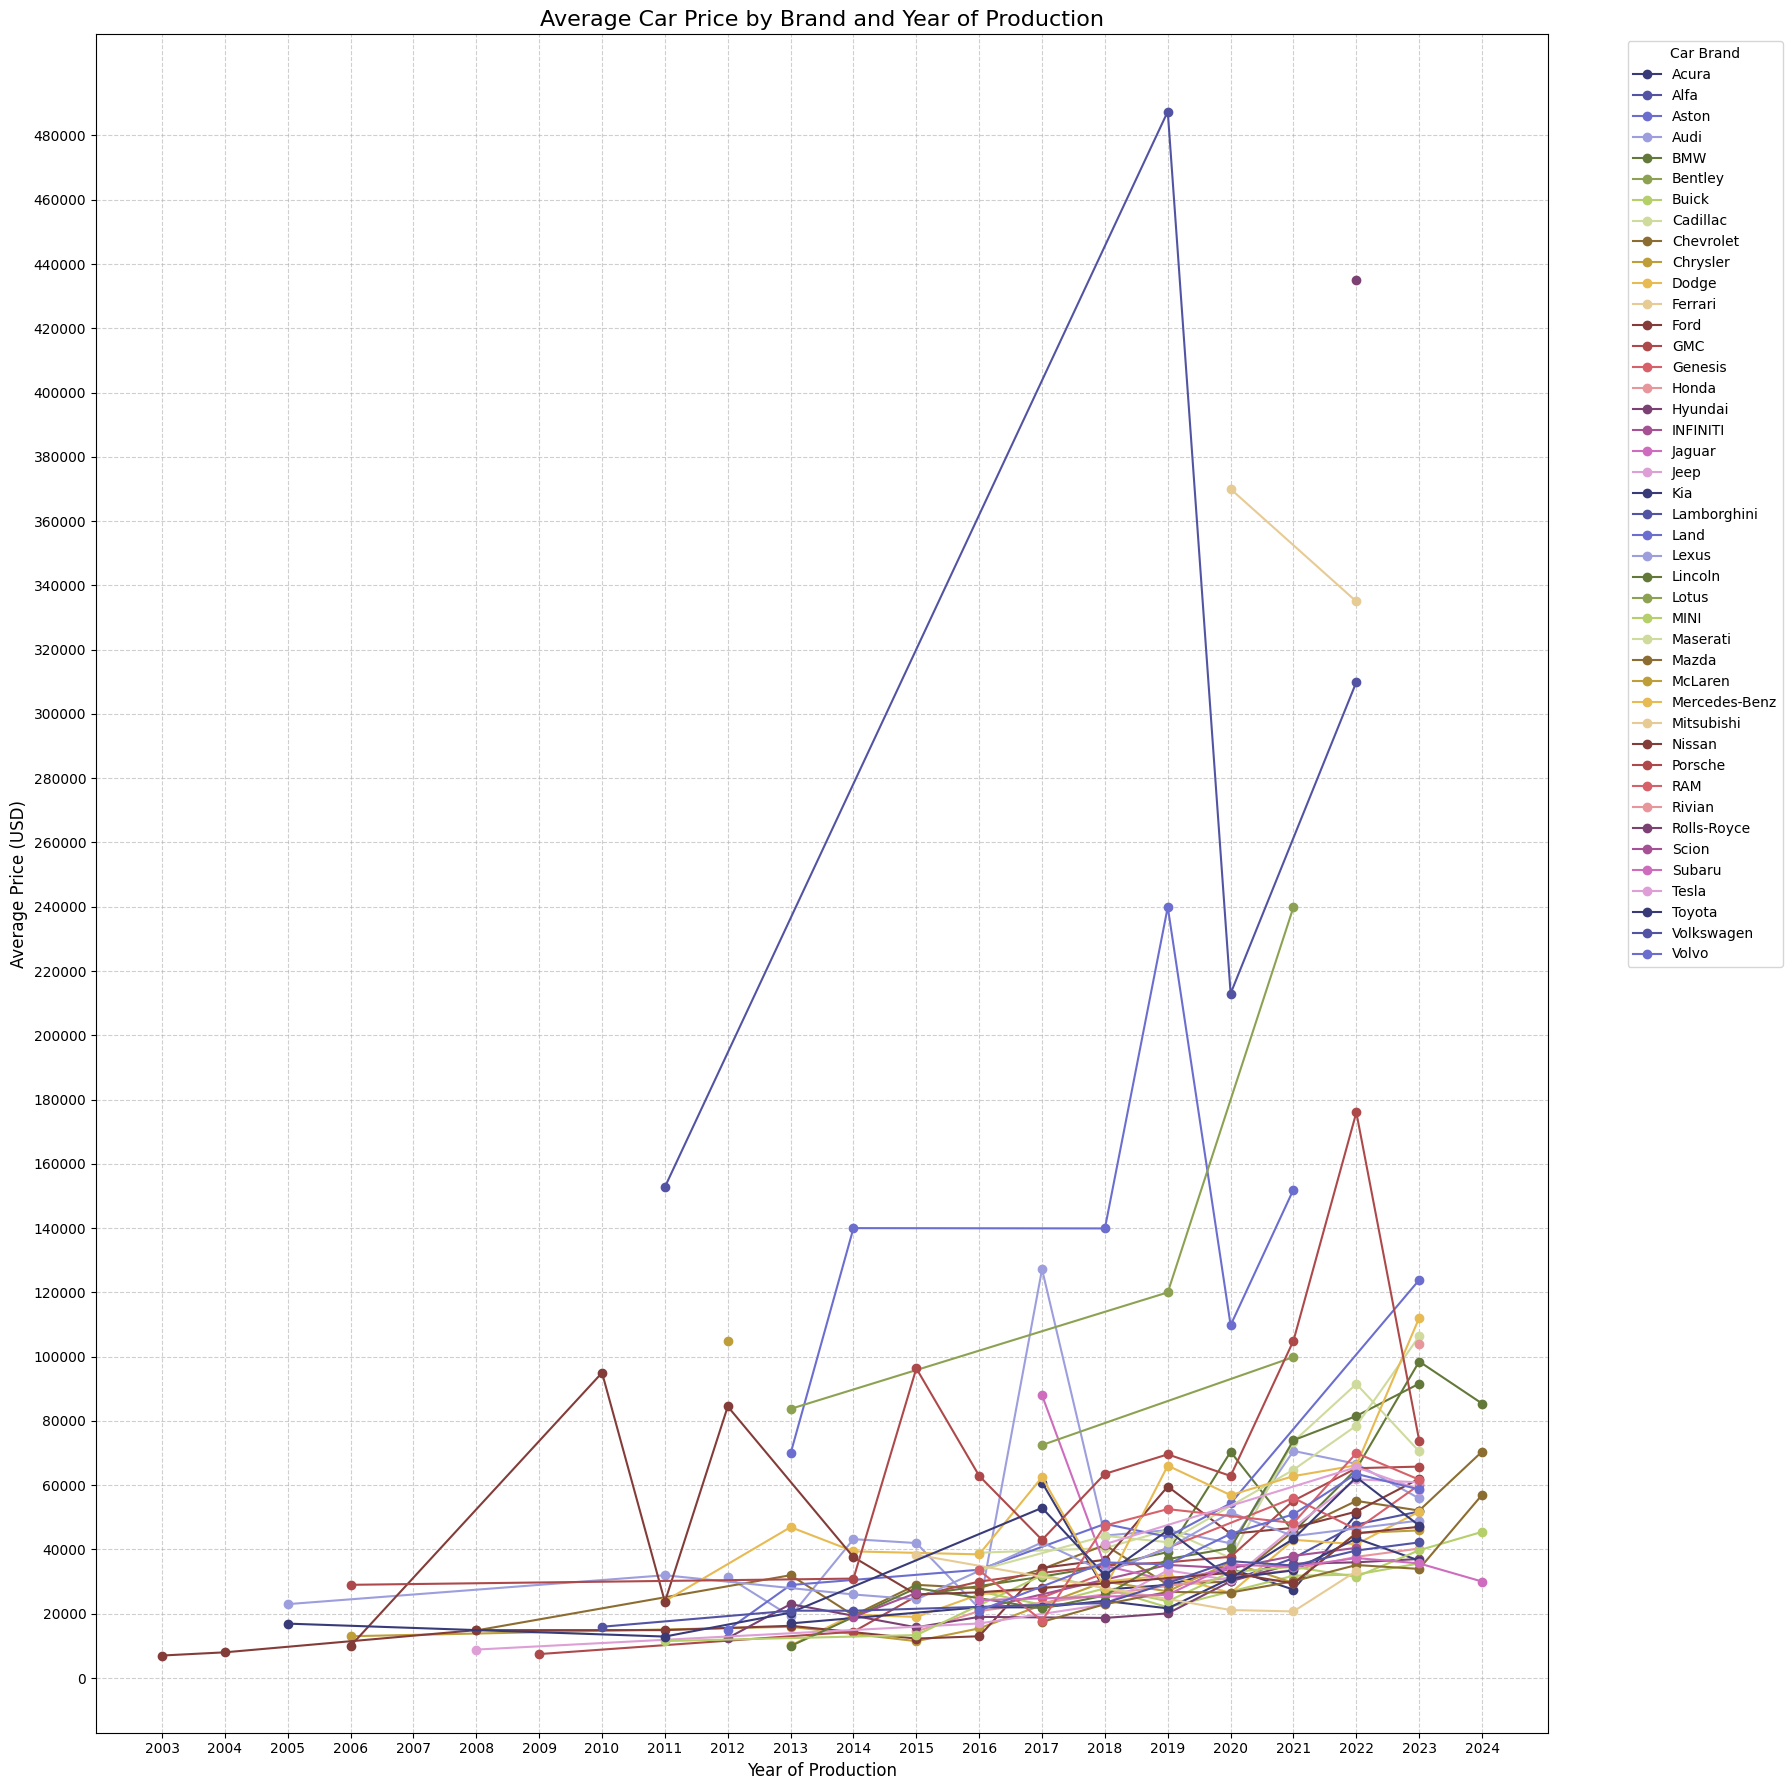

In [66]:
from itertools import cycle  

avg_prices = df.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20b.colors)  


plt.figure(figsize=(18, 18))  

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors) 
    )


plt.title("Average Car Price by Brand and Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1),  
    fontsize=10
)
plt.yticks(range(0, 500000, 20000), fontsize=10) 
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

By using different sources of information in the Internet we can split all car brands in 5 groups:
S-tier: Ferrari, Lamborghini, McLaren, Bentley, Porsche, Aston
A-tier: BMW, Mercedes-Benz, Audi, Rivian, Lotus, Maserati
B-tier: Volvo, Chevrolet, Cadillac, Land Rover, Tesla, Jaguar, INFINITI, Nissan, RAM, Lincoln
C-tier: Ford, Mazda, Genesis, Toyota, GMC, Jeep, Acura, Lexus, Dodge, Alfa
D-tier: Buick, Chrysler, MINI, Mitsubishi, Scion, Subaru, Hyundai, Kia, Honda, Volkswagen

In [67]:
tier_mapping = {
    **dict.fromkeys(['Ferrari', 'Lamborghini', 'McLaren', 'Bentley','Porsche','Rolls-Royce','Aston'], 'S-tier'),
    **dict.fromkeys(['BMW', 'Mercedes-Benz', 'Audi','Rivian','Lotus','Maserati'], 'A-tier'),
    **dict.fromkeys(['Volvo', 'Chevrolet', 'Cadillac', 'Land', 'Tesla','Jaguar', 'INFINITI','RAM','Lincoln','Nissan'], 'B-tier'),
    **dict.fromkeys(['Ford', 'Mazda','Genesis','Toyota','GMC','Jeep','Acura','Lexus','Dodge','Alfa'], 'C-tier'),
    **dict.fromkeys([ 'Buick', 'Chrysler', 'MINI', 'Mitsubishi', 'Scion', 'Subaru','Hyundai','Kia','Honda','Volkswagen'], 'D-tier'),
}

df['Car Tier'] = df['Car Brand'].map(tier_mapping)

Lets add this column into our dataset

Using this information, lets create separate graphs for each of groups:

S-tier:

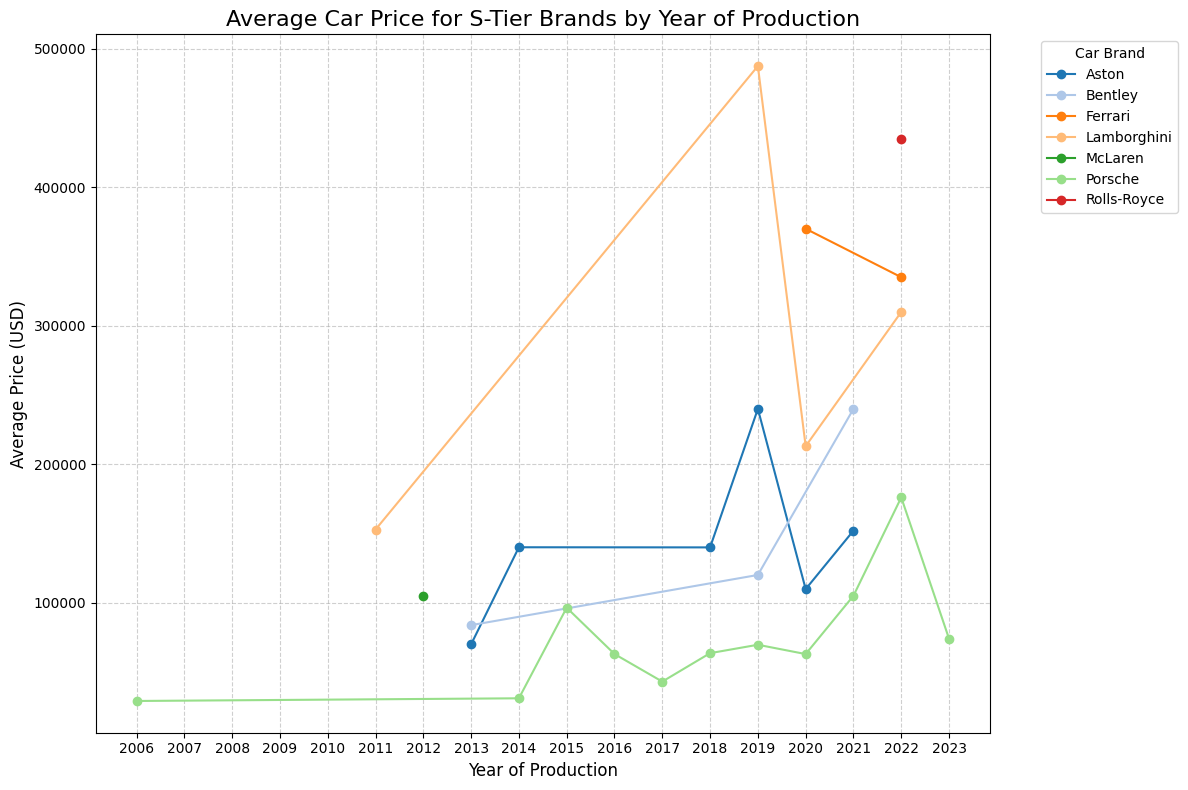

In [68]:

s_tier_brands = ['Ferrari', 'Lamborghini', 'McLaren', 'Bentley','Porsche','Rolls-Royce','Aston']


s_tier_data = df[df['Car Brand'].isin(s_tier_brands)]


avg_prices = s_tier_data.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20.colors)  


plt.figure(figsize=(12, 8)) 

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors) 
    )


plt.title("Average Car Price for S-Tier Brands by Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1), 
    fontsize=10
)
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

A-tier

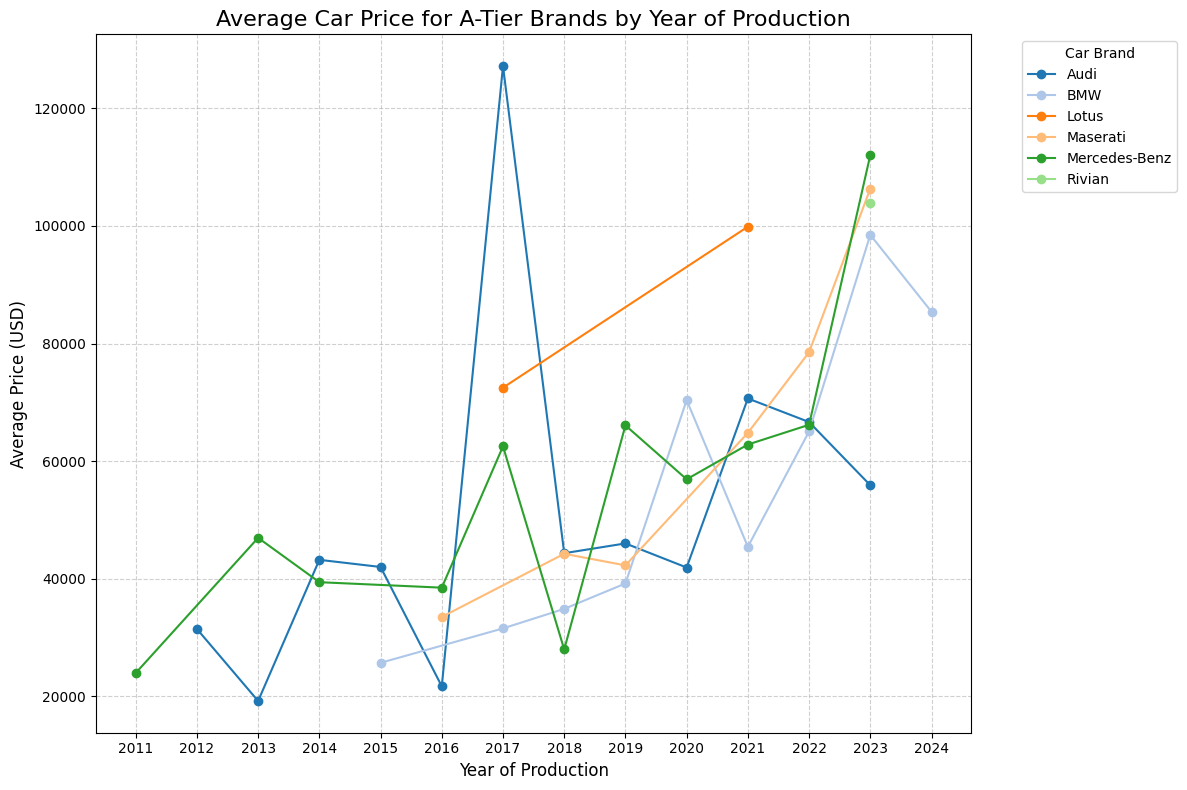

In [69]:
a_tier_brands = ['BMW', 'Mercedes-Benz', 'Audi','Rivian','Lotus','Maserati']

a_tier_data = df[df['Car Brand'].isin(a_tier_brands)]


avg_prices = a_tier_data.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20.colors)  


plt.figure(figsize=(12, 8))  

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors)  
    )


plt.title("Average Car Price for A-Tier Brands by Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1),  # Step = 1
    fontsize=10
)
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

B-tier

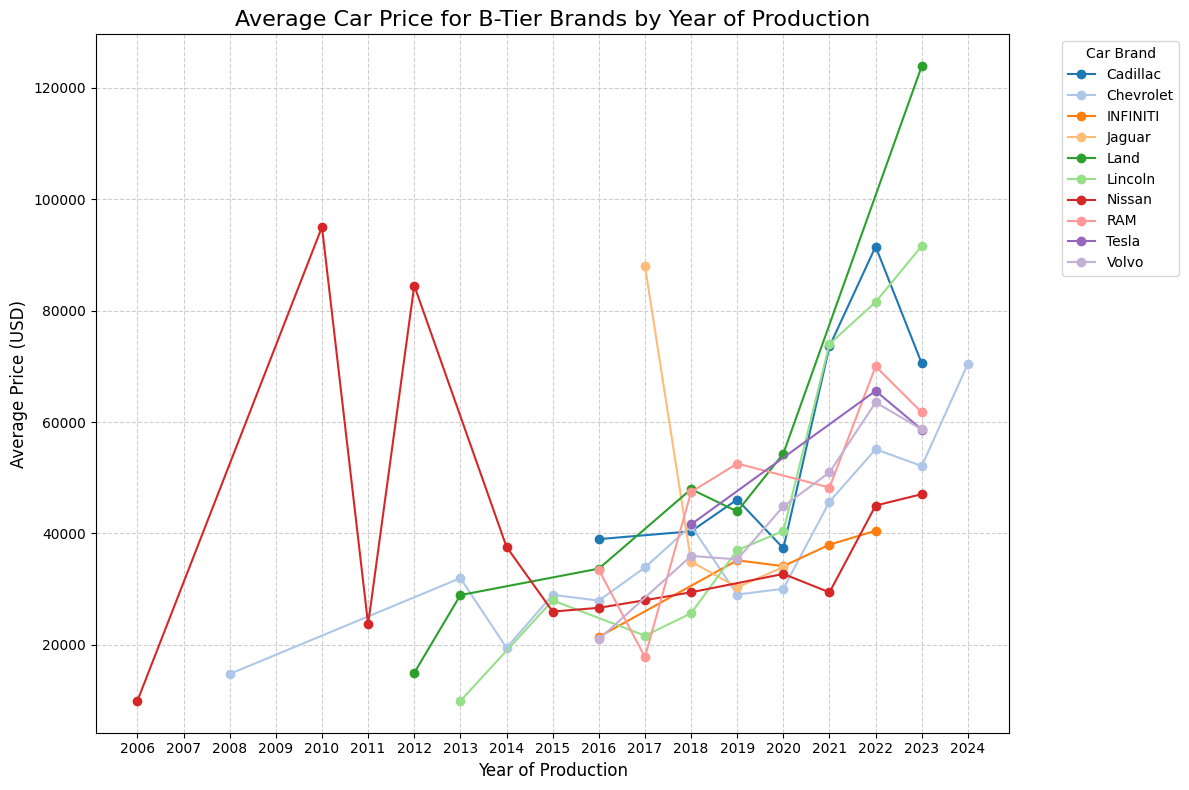

In [70]:
b_tier_brands =['Volvo', 'Chevrolet', 'Cadillac', 'Land', 'Tesla','Jaguar', 'INFINITI','RAM','Lincoln','Nissan']


b_tier_data = df[df['Car Brand'].isin(b_tier_brands)]


avg_prices = b_tier_data.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20.colors)  


plt.figure(figsize=(12, 8)) 

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors)  
    )

# Axis settings
plt.title("Average Car Price for B-Tier Brands by Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1),  
    fontsize=10
)
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

C-tier

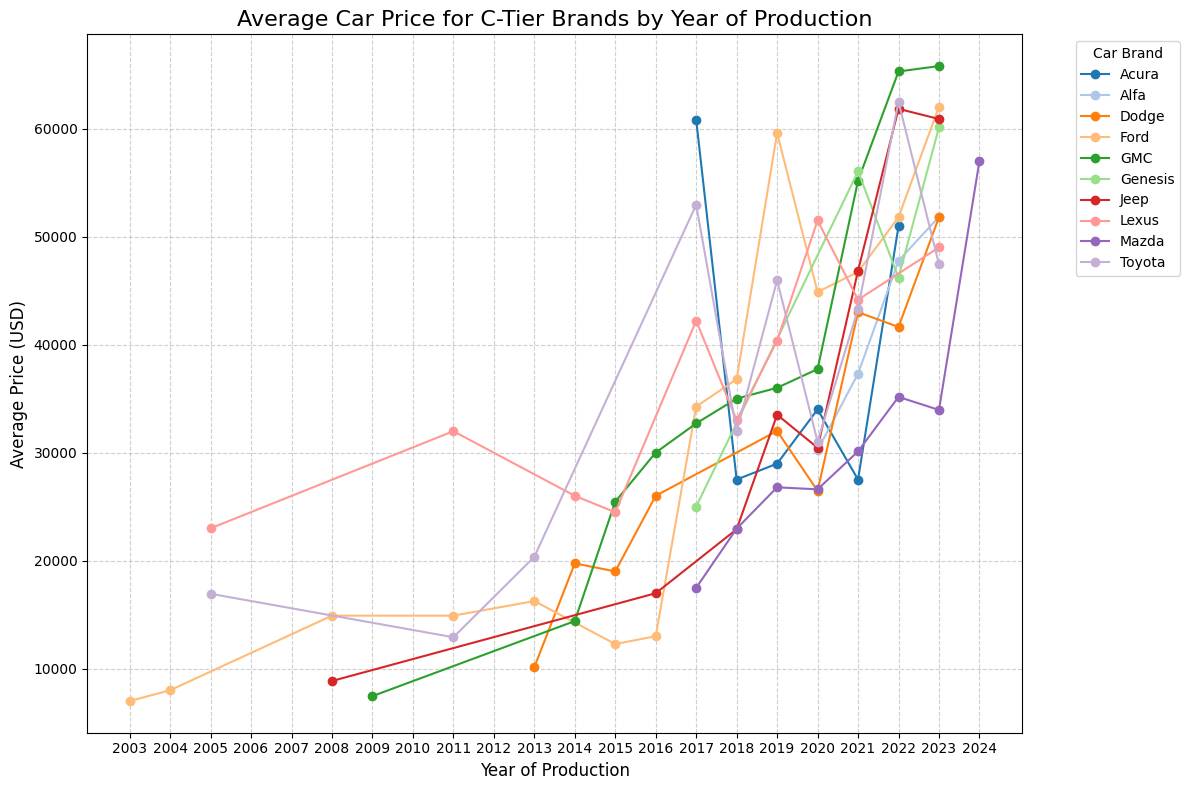

In [71]:
c_tier_brands = ['Ford', 'Mazda','Genesis','Toyota','GMC','Jeep','Acura','Lexus','Dodge','Alfa']


c_tier_data = df[df['Car Brand'].isin(c_tier_brands)]


avg_prices = c_tier_data.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20.colors)  


plt.figure(figsize=(12, 8))  

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors)  
    )


plt.title("Average Car Price for C-Tier Brands by Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1), 
    fontsize=10
)
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

D-tier

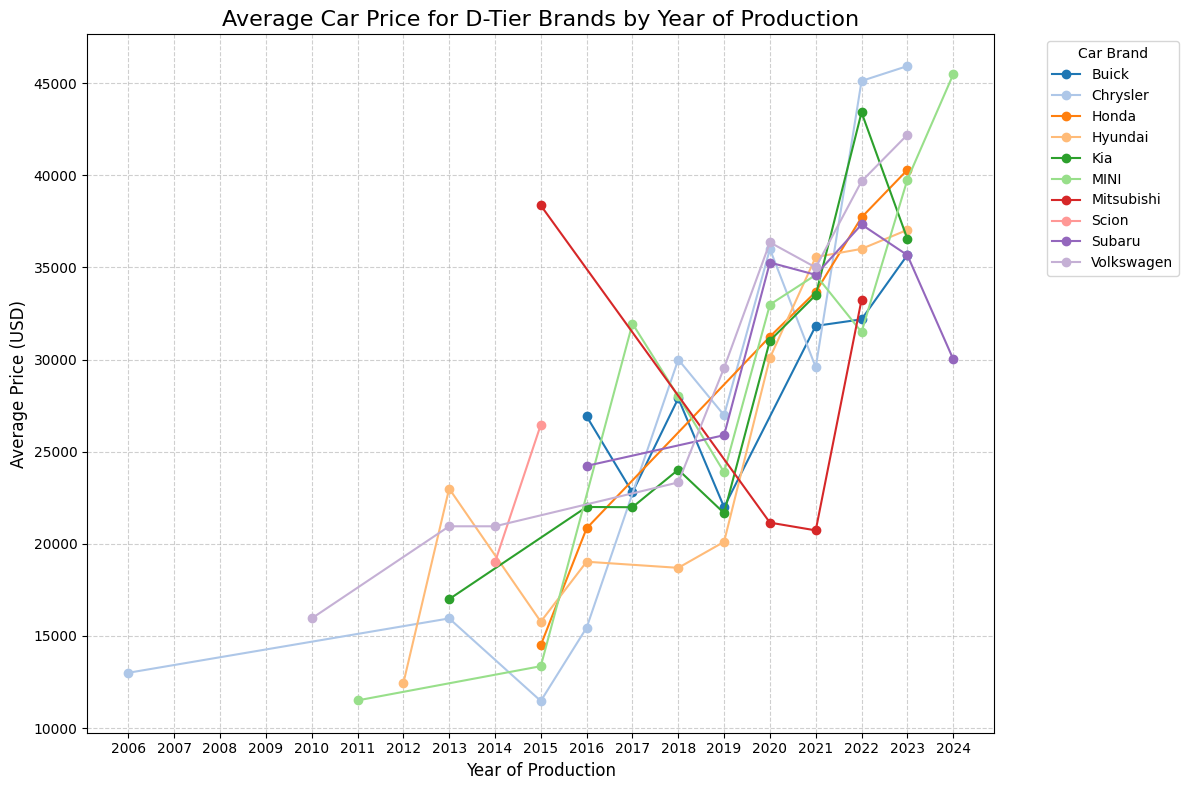

In [72]:
d_tier_brands = [ 'Buick', 'Chrysler', 'MINI', 'Mitsubishi', 'Scion', 'Subaru','Hyundai','Kia','Honda','Volkswagen']


d_tier_data = df[df['Car Brand'].isin(d_tier_brands)]


avg_prices = d_tier_data.groupby(['Car Brand', 'Year of Production'])['Car Price'].mean().reset_index()


brands = avg_prices['Car Brand'].unique()


colors = cycle(plt.cm.tab20.colors)  

plt.figure(figsize=(12, 8)) 

for brand in brands:
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    plt.plot(
        brand_data['Year of Production'], 
        brand_data['Car Price'], 
        marker='o', 
        label=brand, 
        color=next(colors)  
    )


plt.title("Average Car Price for D-Tier Brands by Year of Production", fontsize=16)
plt.xlabel("Year of Production", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(
    range(avg_prices['Year of Production'].min(), avg_prices['Year of Production'].max() + 1, 1),  
    fontsize=10
)
plt.legend(title="Car Brand", fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

We can notice that in some graphs there are sharp changes, for example, average price of Nissan dramatically dropped from approximately 96000$ to 23000$ from 2010 to 2011 and then abruptly increased back to 84000$. There are more graphs with significant fluctuations so we can suppose that year of production and brand are not the only crucial factors that determine the price. There are different types of Special addings in names of cars that increase their price, for example, Edition, Luxury, Limited etc. Lets create a special Uniqueness column where we will check is there anything special in the car

In [73]:

special_name_keywords = ['Premium', 'Luxury', 'Sport', 'Grand', 'Edition', 'Turbo', 'Hybrid', 'Electric', 'Wagon', 'Limited','Touring','Ti']
special_engine_keywords = ['Supercharged', 'Twin Turbo', 'Turbo Diesel','Turbocharged']

df['Specialness'] = df.apply(
    lambda row: (
        1 if any(keyword in str(row['Car Name']) for keyword in special_name_keywords) else 0  
    ) + (
        1 if any(keyword in str(row['Engine']) for keyword in special_engine_keywords) else 0  
    ),
    axis=1
)


print(df[['Car Name', 'Engine', 'Specialness']])

                         Car Name  \
231         Chevrolet Colorado LT   
325              GMC Yukon XL SLT   
1734  Chevrolet Silverado 2500 LT   
474   Chevrolet Silverado 2500 LT   
797      Chevrolet Trailblazer LT   
...                           ...   
567           Chevrolet Tahoe LTZ   
95                Ford E250 Cargo   
763           GMC Sierra 1500 SLT   
1095     Ford F-150 XLT SuperCrew   
788          Toyota Land Cruiser    

                                                 Engine  Specialness  
231   2.7L I-4 gasoline direct injection, DOHC, vari...            0  
325   EcoTec3 5.3L V-8 gasoline direct injection, va...            0  
1734                    Turbocharged Diesel V8 6.6L/403            1  
474                     Turbocharged Diesel V8 6.6L/403            1  
797                          1.3L I3 12V GDI DOHC Turbo            0  
...                                                 ...          ...  
567                  5.3L V8 16V MPFI OHV Flexible Fuel   

Now to see the full picture lets create plots of the dependence of price from car mileage by creating a bar chart that will show the average price of each brand of car depending on their mileage(<1000 miles, from 1000 to 10000 miles, from 10000 miles to 50000 miles, from 50000 miles to 100000 miles, more than 100000 miles) in each tier

First of all, S-tier

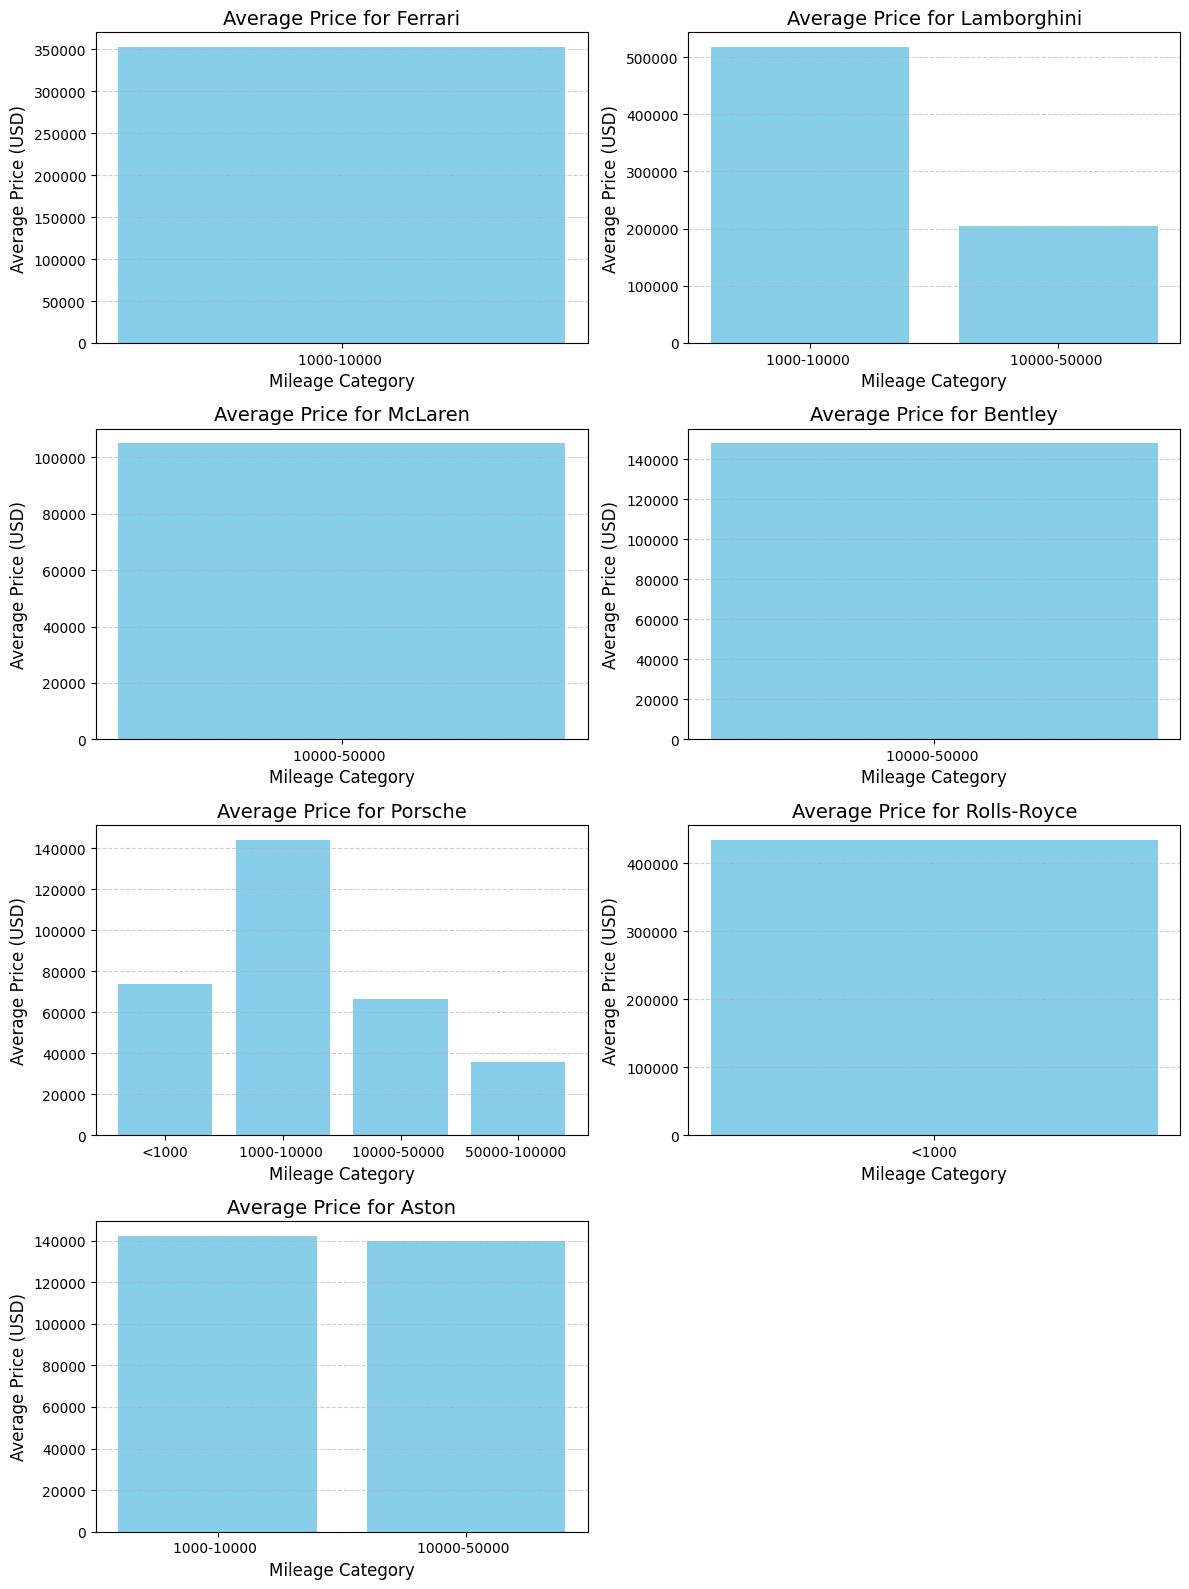

In [74]:
s_tier_brands = ['Ferrari', 'Lamborghini', 'McLaren', 'Bentley', 'Porsche', 'Rolls-Royce', 'Aston']
s_tier_df = df[df['Car Brand'].isin(s_tier_brands)].copy()  


bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1000', '1000-10000 ', '10000-50000 ', '50000-100000 ', '>100000 ']
s_tier_df.loc[:, 'Mileage Category'] = pd.cut(s_tier_df['Car Mileage'], bins=bins, labels=labels)


avg_prices = (
    s_tier_df.groupby(['Mileage Category', 'Car Brand'], observed=False)['Car Price']
    .mean()
    .reset_index()
)


num_brands = len(s_tier_brands)
ncols = 2
nrows = (num_brands + 1) // ncols  

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))  


axes = axes.flatten()


for idx, brand in enumerate(s_tier_brands):
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]
    
    brand_data = (
        brand_data.set_index('Mileage Category')
        .reindex(labels, fill_value=0)
        .reset_index()
    )
    
    ax = axes[idx]

    ax.bar(brand_data['Mileage Category'], brand_data['Car Price'], color='skyblue')

    ax.set_title(f'Average Price for {brand}', fontsize=14)
    ax.set_xlabel('Mileage Category', fontsize=12)
    ax.set_ylabel('Average Price (USD)', fontsize=12)


    ax.grid(axis='y', linestyle='--', alpha=0.6)


for idx in range(len(s_tier_brands), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

A-tier:

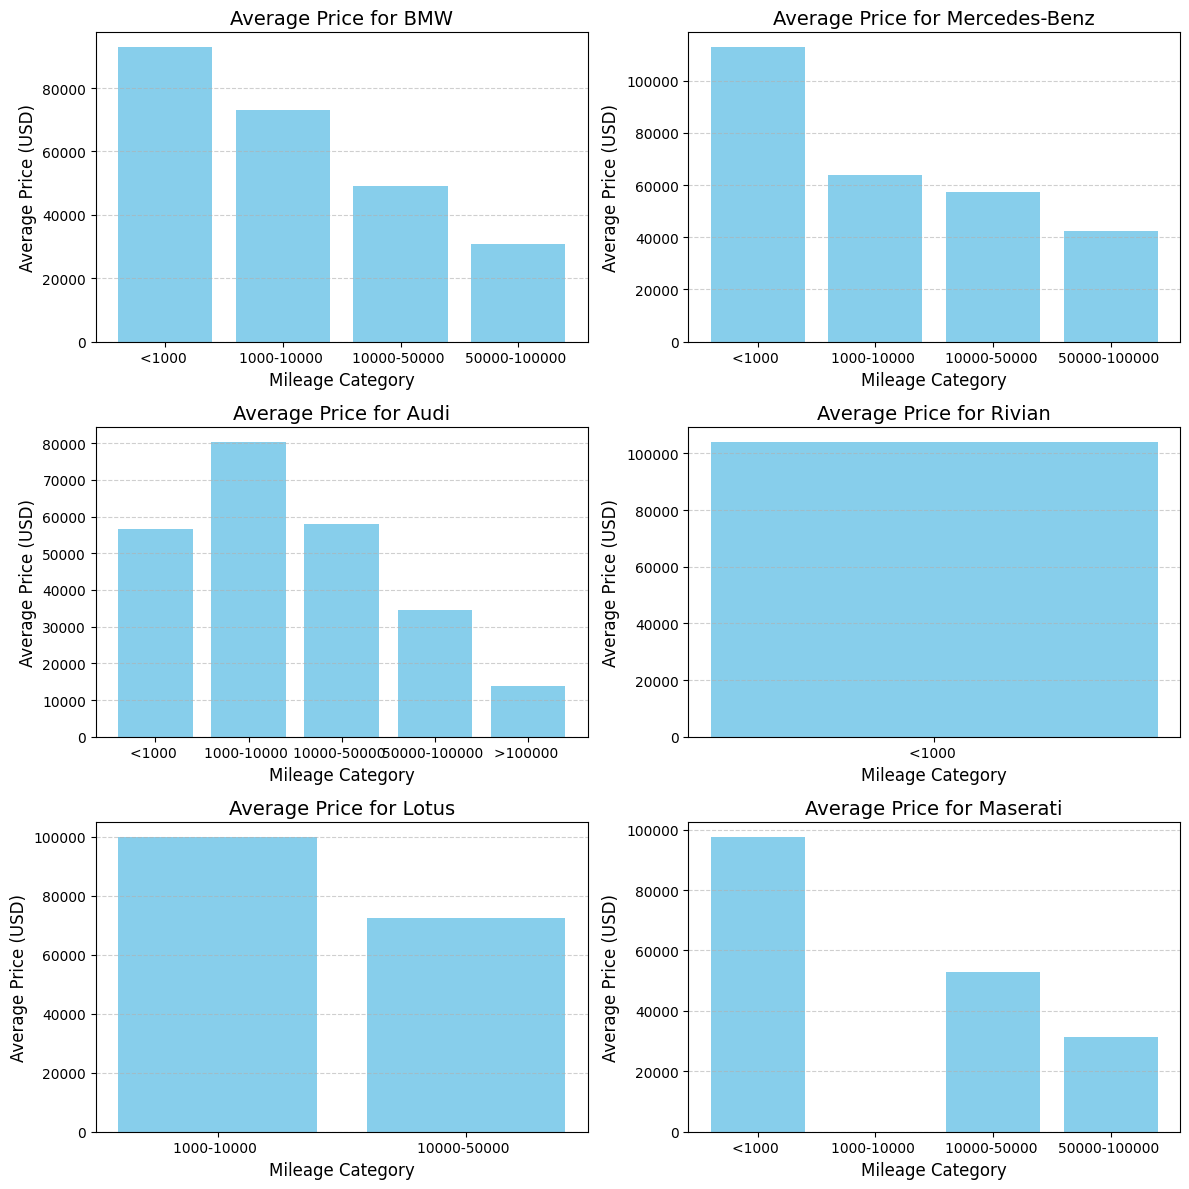

In [75]:

a_tier_brands = ['BMW', 'Mercedes-Benz', 'Audi','Rivian','Lotus','Maserati']
a_tier_df = df[df['Car Brand'].isin(a_tier_brands)].copy()  


bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1000 ', '1000-10000 ', '10000-50000 ', '50000-100000 ', '>100000 ']
a_tier_df.loc[:, 'Mileage Category'] = pd.cut(a_tier_df['Car Mileage'], bins=bins, labels=labels)  


avg_prices = (
    a_tier_df.groupby(['Mileage Category', 'Car Brand'], observed=False)['Car Price']
    .mean()
    .reset_index()
)  


num_brands = len(a_tier_brands)
ncols = 2
nrows = (num_brands + 1) // ncols  

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows)) 

axes = axes.flatten()

mileage_categories = ['<1000', '1000-10000', '10000-50000', '50000-100000', '>100000']

for idx, brand in enumerate(a_tier_brands):
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]

    brand_data = (
        brand_data.set_index('Mileage Category')
        .reindex(labels, fill_value=0)
        .reset_index()
    ) 

  
    ax = axes[idx]


    ax.bar(brand_data['Mileage Category'], brand_data['Car Price'], color='skyblue')


    ax.set_title(f'Average Price for {brand}', fontsize=14)
    ax.set_xlabel('Mileage Category', fontsize=12)
    ax.set_ylabel('Average Price (USD)', fontsize=12)


    ax.grid(axis='y', linestyle='--', alpha=0.6)


for idx in range(num_brands, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

B-tier

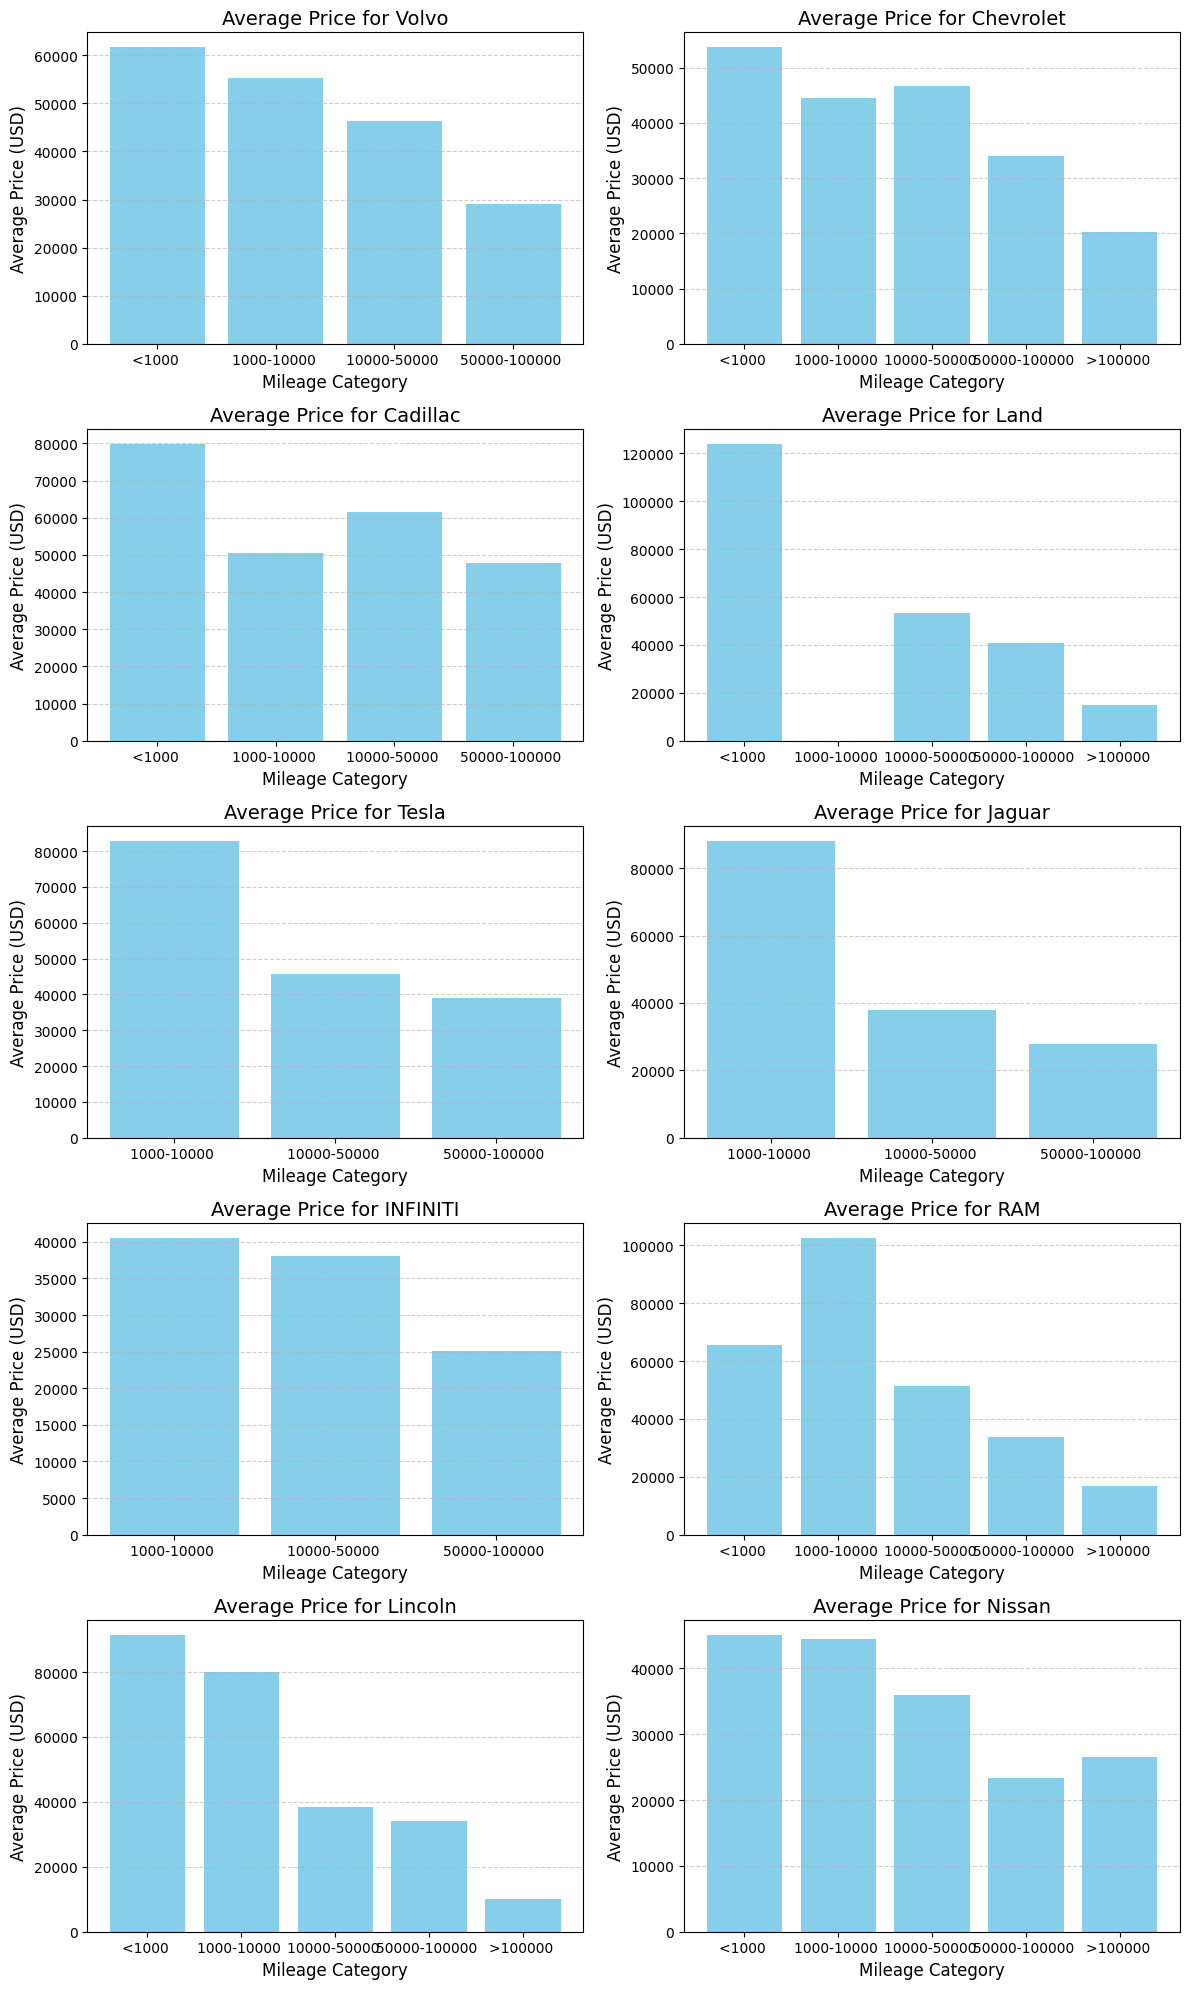

In [76]:
b_tier_brands = ['Volvo', 'Chevrolet', 'Cadillac', 'Land', 'Tesla','Jaguar', 'INFINITI','RAM','Lincoln','Nissan']
b_tier_df = df[df['Car Brand'].isin(b_tier_brands)].copy()  

bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1000 ', '1000-10000 ', '10000-50000 ', '50000-100000 ', '>100000 ']
b_tier_df.loc[:, 'Mileage Category'] = pd.cut(b_tier_df['Car Mileage'], bins=bins, labels=labels)  


avg_prices = (
    b_tier_df.groupby(['Mileage Category', 'Car Brand'], observed=False)['Car Price']
    .mean()
    .reset_index()
)  


num_brands = len(b_tier_brands)
ncols = 2
nrows = (num_brands + 1) // ncols  

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows))  

axes = axes.flatten()

mileage_categories = ['<1000', '1000-10000', '10000-50000', '50000-100000', '>100000']

for idx, brand in enumerate(b_tier_brands):
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]

    brand_data = (
        brand_data.set_index('Mileage Category')
        .reindex(labels, fill_value=0)
        .reset_index()
    )  


    ax = axes[idx]

    ax.bar(brand_data['Mileage Category'], brand_data['Car Price'], color='skyblue')

    ax.set_title(f'Average Price for {brand}', fontsize=14)
    ax.set_xlabel('Mileage Category', fontsize=12)
    ax.set_ylabel('Average Price (USD)', fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.6)

for idx in range(num_brands, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

C-tier

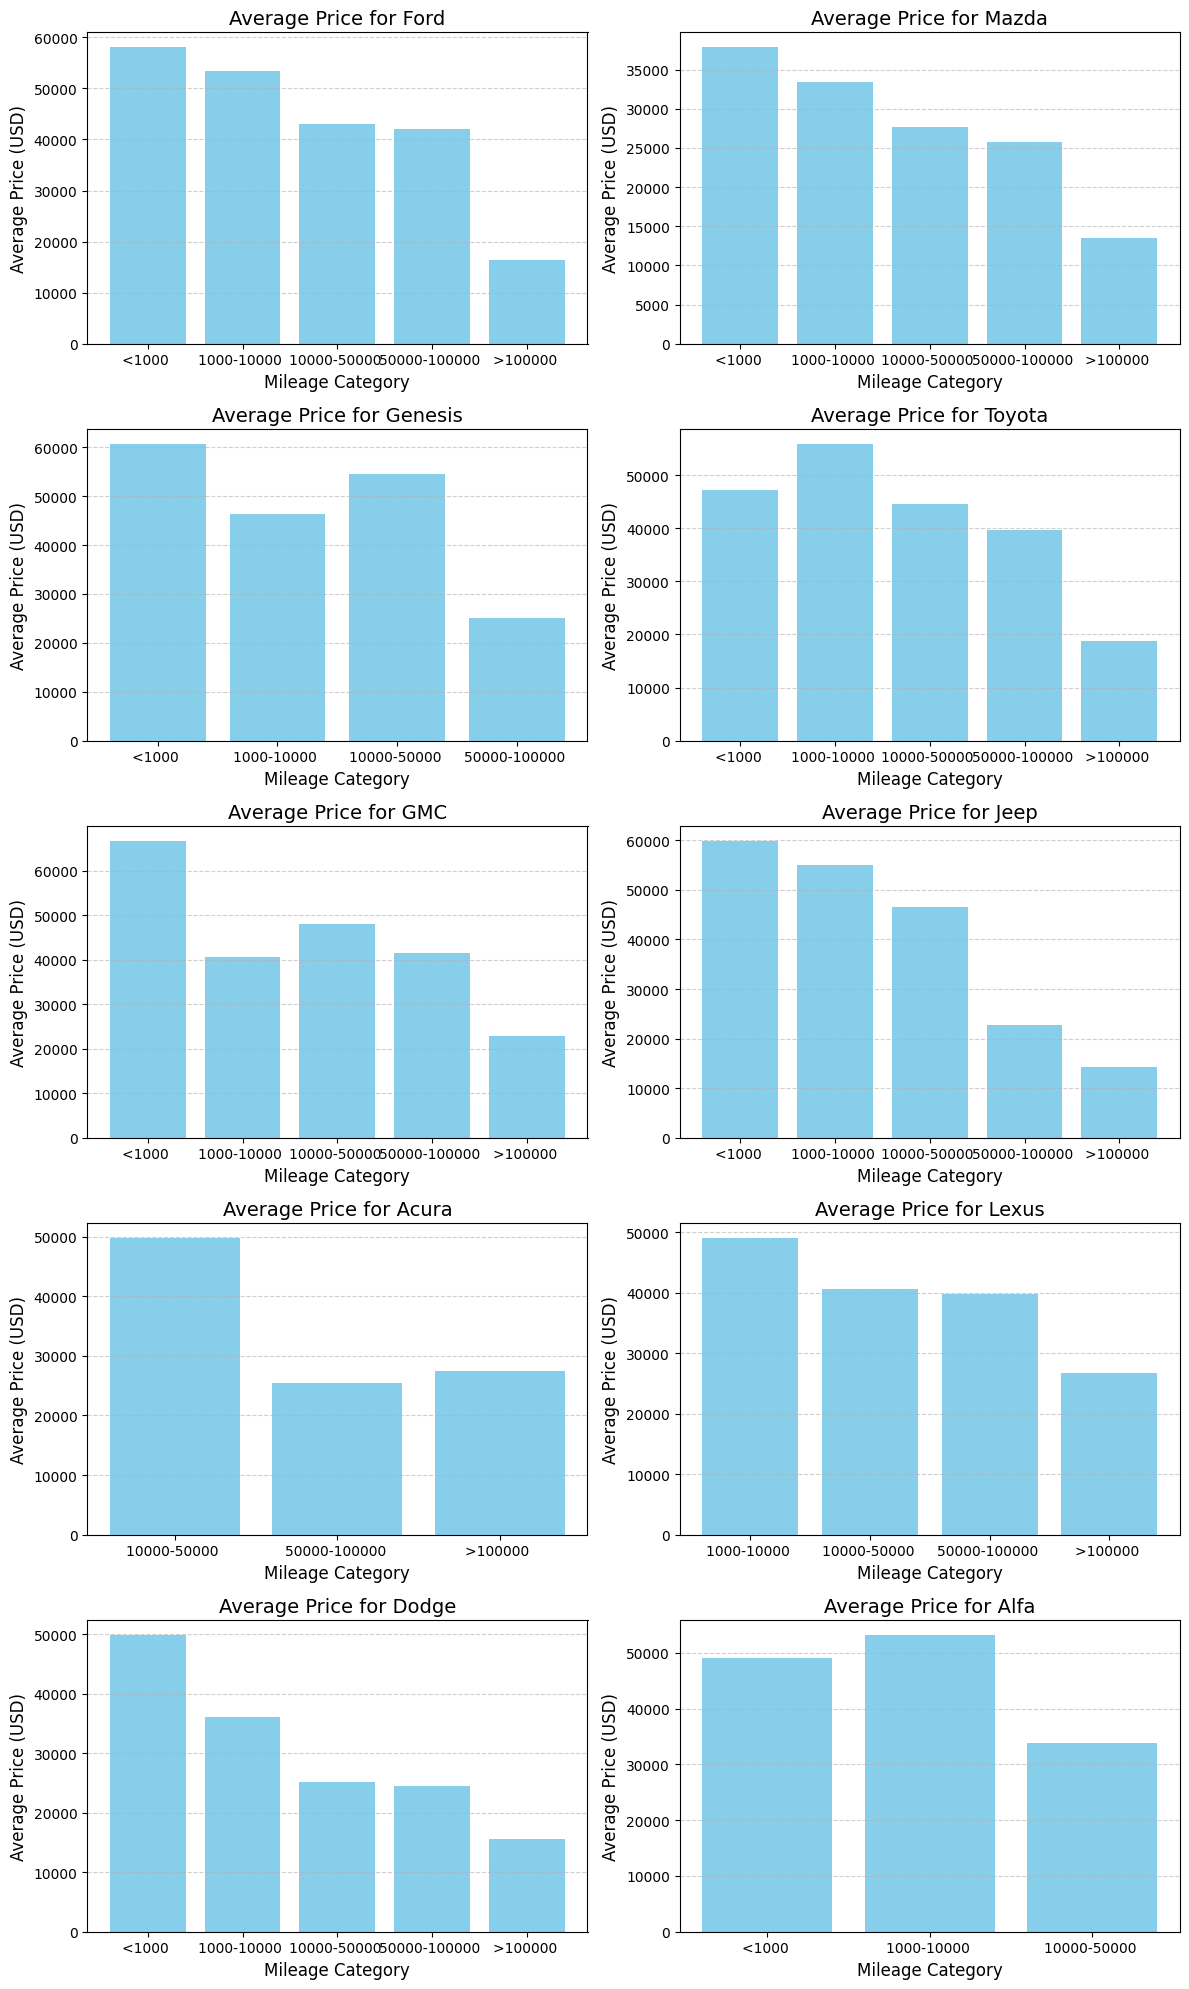

In [77]:
c_tier_brands =  ['Ford', 'Mazda','Genesis','Toyota','GMC','Jeep','Acura','Lexus','Dodge','Alfa']
c_tier_df = df[df['Car Brand'].isin(c_tier_brands)].copy() 

bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1000 ', '1000-10000 ', '10000-50000 ', '50000-100000 ', '>100000 ']
c_tier_df.loc[:, 'Mileage Category'] = pd.cut(c_tier_df['Car Mileage'], bins=bins, labels=labels)  


avg_prices = (
    c_tier_df.groupby(['Mileage Category', 'Car Brand'], observed=False)['Car Price']
    .mean()
    .reset_index()
) 

num_brands = len(c_tier_brands)
ncols = 2
nrows = (num_brands + 1) // ncols  

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows)) 

axes = axes.flatten()

mileage_categories = ['<1000', '1000-10000', '10000-50000', '50000-100000', '>100000']

for idx, brand in enumerate(c_tier_brands):
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]

    brand_data = (
        brand_data.set_index('Mileage Category')
        .reindex(labels, fill_value=0)
        .reset_index()
    ) 

    ax = axes[idx]

    ax.bar(brand_data['Mileage Category'], brand_data['Car Price'], color='skyblue')

    ax.set_title(f'Average Price for {brand}', fontsize=14)
    ax.set_xlabel('Mileage Category', fontsize=12)
    ax.set_ylabel('Average Price (USD)', fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.6)

for idx in range(num_brands, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

D-tier

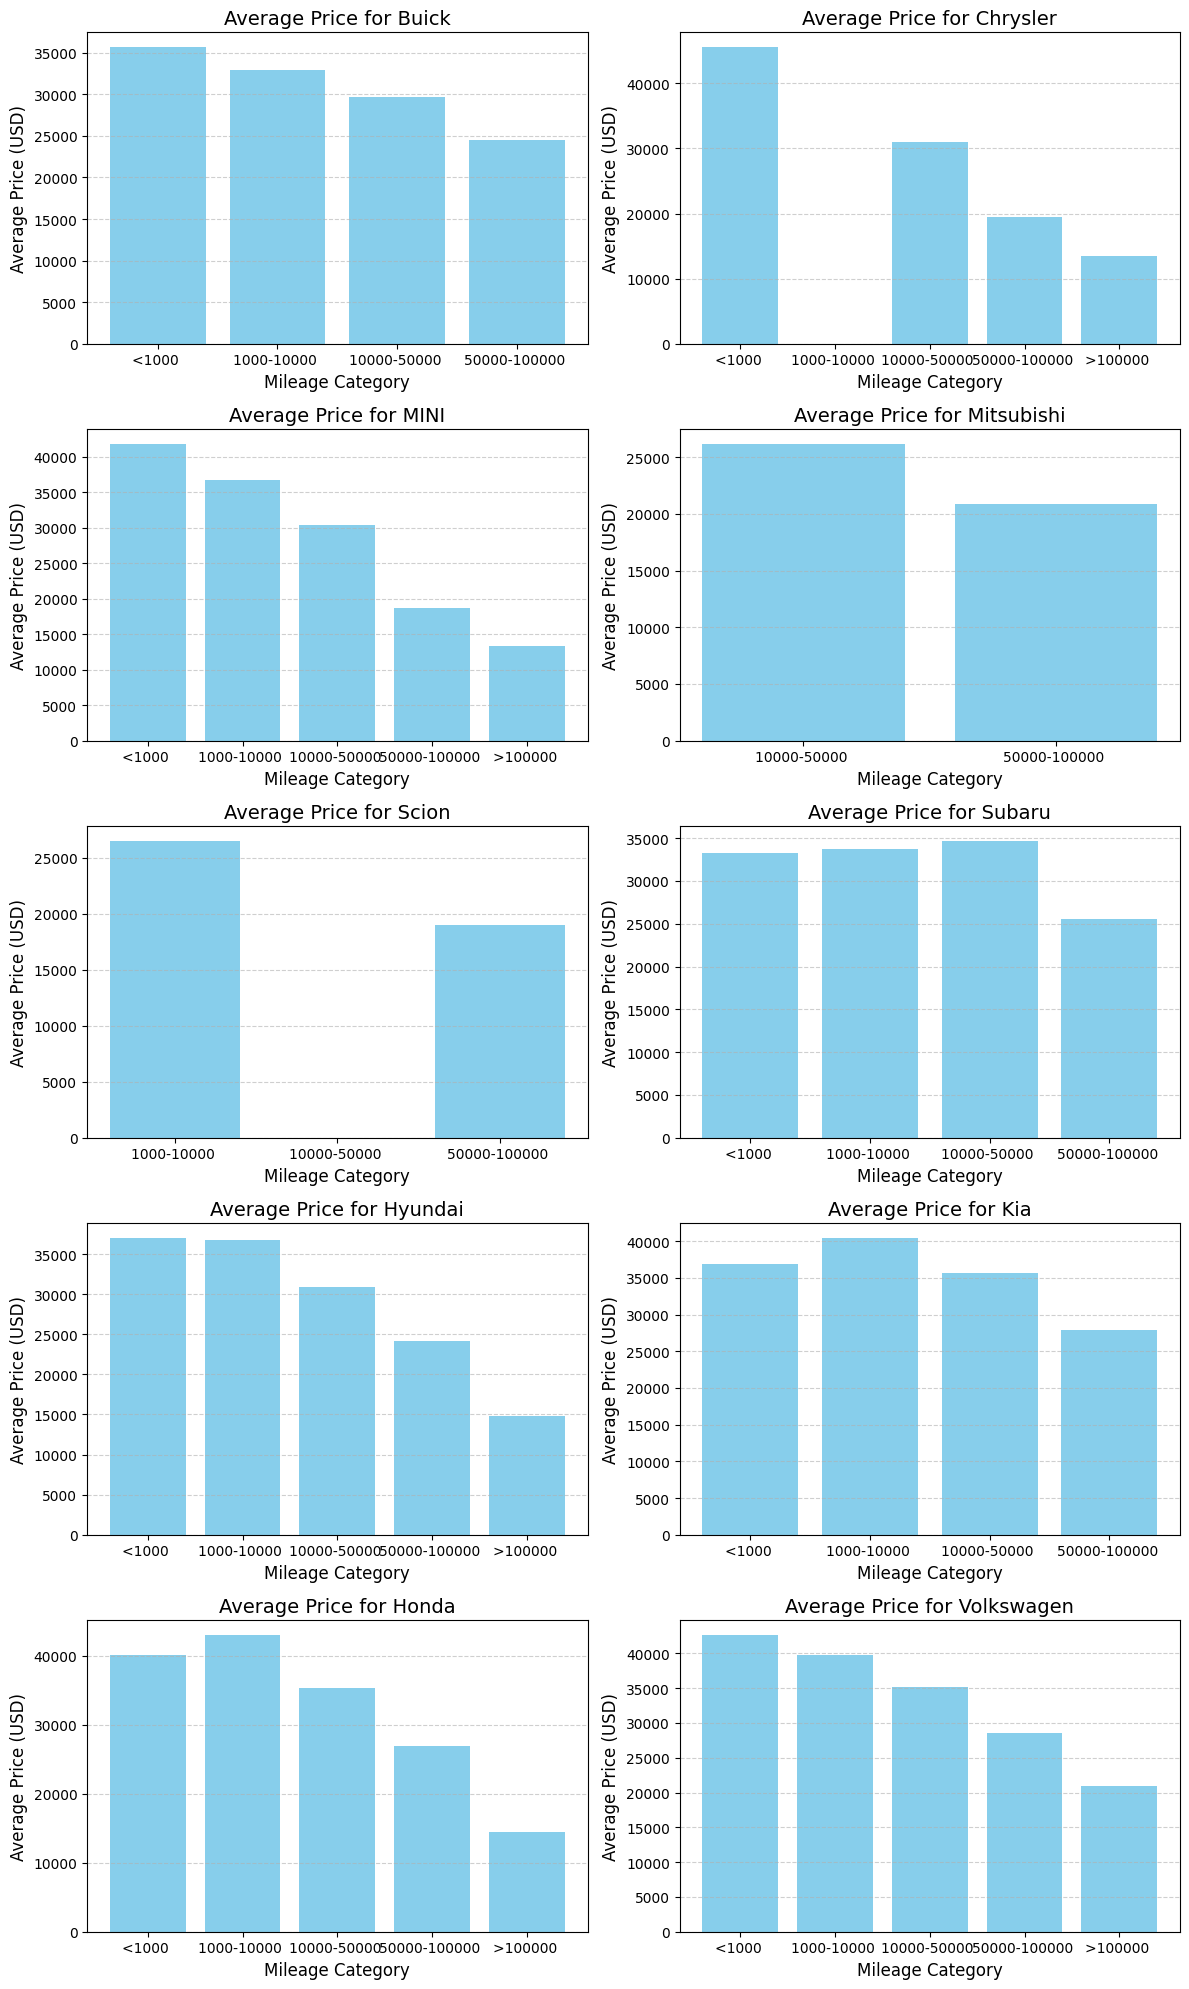

In [78]:
d_tier_brands = [ 'Buick', 'Chrysler', 'MINI', 'Mitsubishi', 'Scion', 'Subaru','Hyundai','Kia','Honda','Volkswagen']
d_tier_df = df[df['Car Brand'].isin(d_tier_brands)].copy() 

bins = [0, 1000, 10000, 50000, 100000, float('inf')]
labels = ['<1000 ', '1000-10000 ', '10000-50000 ', '50000-100000 ', '>100000 ']
d_tier_df.loc[:, 'Mileage Category'] = pd.cut(d_tier_df['Car Mileage'], bins=bins, labels=labels)

avg_prices = (
    d_tier_df.groupby(['Mileage Category', 'Car Brand'], observed=False)['Car Price']
    .mean()
    .reset_index()
) 


num_brands = len(d_tier_brands)
ncols = 2
nrows = (num_brands + 1) // ncols 

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows)) 

axes = axes.flatten()


mileage_categories = ['<1000', '1000-10000', '10000-50000', '50000-100000', '>100000']


for idx, brand in enumerate(d_tier_brands):
    brand_data = avg_prices[avg_prices['Car Brand'] == brand]

    brand_data = (
        brand_data.set_index('Mileage Category')
        .reindex(labels, fill_value=0)
        .reset_index()
    )  

    ax = axes[idx]

    ax.bar(brand_data['Mileage Category'], brand_data['Car Price'], color='skyblue')

    ax.set_title(f'Average Price for {brand}', fontsize=14)
    ax.set_xlabel('Mileage Category', fontsize=12)
    ax.set_ylabel('Average Price (USD)', fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.6)

for idx in range(num_brands, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

We can see that in practically all cases,the price of car decreases with increase of mileage. In some cases it does not work like that, for example, if we take a look at last graph Alfa: the car price actually increased but it happened because there is just car with mileage from 1000-10000 miles and it is Alfa Romeo Stelvio TI, where TI stands for Turismo Internazionale, so it has strengthened sports suspensions and improved dynamic performance, especially in handling and stability and possible equipment improvements (eg sports seats, unique wheels, etc.).

Lets take a look at our dataset now:

In [79]:
df.reset_index(drop=True, inplace=True)

In [80]:
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,TimeStamp,Source,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,2023-04-30 11:07:50.083642,Cars.com,2023,Chevrolet,2.7,10k-50k,B-tier,0
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,2023-04-30 11:14:14.288580,Cars.com,2023,GMC,5.3,50k-100k,C-tier,0
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,2023-04-30 12:44:08.417199,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,2023-04-30 11:24:23.732658,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,2023-04-30 11:44:44.829232,Cars.com,2023,Chevrolet,1.3,10k-50k,B-tier,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,2023-04-30 11:30:10.005687,Cars.com,2008,Chevrolet,5.3,10k-50k,B-tier,0
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,2023-04-30 10:58:41.867827,Cars.com,2011,Ford,5.4,10k-50k,C-tier,0
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,2023-04-30 11:42:47.982457,Cars.com,2015,GMC,5.3,10k-50k,C-tier,0
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,2023-04-30 12:03:45.495419,Cars.com,2004,Ford,4.6,0-10k,C-tier,0


We can notice that in DriveTrain column there are some values like 4WD, AWD, FWD, RWD which stand for "Four-wheel drive", "All-wheel drive","Front-wheel drive","Rear-wheel drive" respectively. We can replace these values so our dataset is easier to analyse

In [81]:
df['Drivetrain'] = df['Drivetrain'].replace({
    '4WD': 'Four-wheel Drive',
    'AWD': 'All-wheel Drive',
    'FWD': 'Front-wheel Drive',
    'RWD': 'Rear-wheel Drive'
})
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,TimeStamp,Source,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,2023-04-30 11:07:50.083642,Cars.com,2023,Chevrolet,2.7,10k-50k,B-tier,0
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,2023-04-30 11:14:14.288580,Cars.com,2023,GMC,5.3,50k-100k,C-tier,0
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,2023-04-30 12:44:08.417199,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,2023-04-30 11:24:23.732658,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,2023-04-30 11:44:44.829232,Cars.com,2023,Chevrolet,1.3,10k-50k,B-tier,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,2023-04-30 11:30:10.005687,Cars.com,2008,Chevrolet,5.3,10k-50k,B-tier,0
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,2023-04-30 10:58:41.867827,Cars.com,2011,Ford,5.4,10k-50k,C-tier,0
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,2023-04-30 11:42:47.982457,Cars.com,2015,GMC,5.3,10k-50k,C-tier,0
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,2023-04-30 12:03:45.495419,Cars.com,2004,Ford,4.6,0-10k,C-tier,0


My Hypothesis

Regarding this hypothesis, I believe that the price of a car depends on several factors:

Car Mileage is the most significant factor influencing car price. Year of Production is the 2 most important factor and car tier is just narrowly less valuable. Engine volume and drivetrain are moderately notable and have comparable levels of impact. Transmission, Fuel Type, Specialness show weak relationships with car price and of these three Specialness is the least impactful because we can see that price nearly does not change with Specialness increasing and even drops almost by half when hitting its maximum point

My idea involves restructuring our data set. I plan to introduce new columns that contain types of fuel, transmission, drivetrain, Car Tier represented digitally. I have already splitted our cars into "tiers" for convenience

Lets add Drivetrain_rating column using this information from online-sources:
	1.	AWD: 8/10.WD provides good balance between performance and practicality. It’s great for everyday use in all weather conditions, especially in rain, snow, and moderate off-road terrain but it has reduced fuel efficiency
	2.	4WD: 9/10. 4WD systems are superior when it comes to serious off-roading and handling tough terrains. It’s the go-to option for off-road enthusiasts and trucks designed for heavy-duty use. It’s the best choice for rugged conditions but it might seem complicated to use for someone.
	3.	RWD: 6/10. RWD is ideal for performance and handling on dry roads, providing a more dynamic driving experience. It’s used in sports cars, luxury sedans, and vehicles that require towing capacity. However, it struggles in wet or snowy conditions, making it less versatile compared to AWD or 4WD.
	4.	FWD: 5/10. FWD is the most fuel-efficient and cost-effective drivetrain, commonly found in compact cars and sedans. While it’s great for urban commuting and dry road conditions, it lacks the traction and capability of AWD and 4WD systems in adverse weather or off-road situations.


In [82]:
df['Drivetrain_rating'] = df['Drivetrain'].replace({
    'Four-wheel Drive': 9,
    'All-wheel Drive': 8, 
    'Front-wheel Drive': 5,
    'Rear-wheel Drive': 6
})

df['Drivetrain_rating'] = pd.to_numeric(df['Drivetrain_rating'], errors='coerce')

df['Drivetrain_rating'] = df['Drivetrain_rating'].fillna(4).astype(int)  
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,TimeStamp,Source,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,2023-04-30 11:07:50.083642,Cars.com,2023,Chevrolet,2.7,10k-50k,B-tier,0,6
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,2023-04-30 11:14:14.288580,Cars.com,2023,GMC,5.3,50k-100k,C-tier,0,9
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,2023-04-30 12:44:08.417199,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,2023-04-30 11:24:23.732658,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,2023-04-30 11:44:44.829232,Cars.com,2023,Chevrolet,1.3,10k-50k,B-tier,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,2023-04-30 11:30:10.005687,Cars.com,2008,Chevrolet,5.3,10k-50k,B-tier,0,9
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,2023-04-30 10:58:41.867827,Cars.com,2011,Ford,5.4,10k-50k,C-tier,0,6
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,2023-04-30 11:42:47.982457,Cars.com,2015,GMC,5.3,10k-50k,C-tier,0,6
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,2023-04-30 12:03:45.495419,Cars.com,2004,Ford,4.6,0-10k,C-tier,0,6


Now lets add the Transmission_rating column. We will change columns that look like "x-speed Automatic" to x where x is a number from 1 to 10. If the information is just "Automatic" we can take "middle" from 1 to 10 - 6. In every other situation lets just change to 4

In [83]:
df['Transmission_rating'] = df['Transmission']
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'(\d+)-Speed.*', r'\1', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'(\d+)-Spd.*', r'\1', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'Automatic', '6', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].where(df['Transmission_rating'].str.match(r'^\d+$'), 4)
df['Transmission_rating'] = df['Transmission_rating'].astype(int)
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,TimeStamp,Source,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,2023-04-30 11:07:50.083642,Cars.com,2023,Chevrolet,2.7,10k-50k,B-tier,0,6,6
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,2023-04-30 11:14:14.288580,Cars.com,2023,GMC,5.3,50k-100k,C-tier,0,9,6
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,2023-04-30 12:44:08.417199,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,2023-04-30 11:24:23.732658,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,2023-04-30 11:44:44.829232,Cars.com,2023,Chevrolet,1.3,10k-50k,B-tier,0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,2023-04-30 11:30:10.005687,Cars.com,2008,Chevrolet,5.3,10k-50k,B-tier,0,9,4
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,2023-04-30 10:58:41.867827,Cars.com,2011,Ford,5.4,10k-50k,C-tier,0,6,4
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,2023-04-30 11:42:47.982457,Cars.com,2015,GMC,5.3,10k-50k,C-tier,0,6,6
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,2023-04-30 12:03:45.495419,Cars.com,2004,Ford,4.6,0-10k,C-tier,0,6,4


Now lets add Car Tier_rating column where we will give the brand rating to all of cars
1. The "S-tier" (Super Tier) is the highest rating, commonly used in gaming, car culture, and product reviews to denote exceptional quality. These are the top-of-the-line cars in terms of performance, luxury, technology, and brand prestige. 10/10
2. The "A-tier" includes vehicles that are excellent but might not have the absolute performance or prestige of S-tier cars. They are still high-end in terms of performance, comfort, and features, but maybe not as rare or exclusive as S-tier cars 8/10
3. B-tier cars are still considered good and reliable, but they may lack some of the advanced features, premium materials, or performance found in the higher tiers. These cars are often solid, practical, and well-regarded in their class but do not stand out in the same way as A-tier or S-tier vehicles.
4. C-tier vehicles are generally considered average, with some deficiencies in performance, features, or overall appeal compared to higher-tier vehicles. While these cars can still serve their purpose and may offer value for money, they may lack certain quality or performance features expected in higher-tier vehicles.
5. D-tier cars are considered below average, likely due to poor performance, outdated features, low reliability, or other factors that make them less desirable. They are typically vehicles that fail to meet modern standards or may be in poor condition (e.g., older budget cars or cars that have lost much of their market appeal).

In [84]:
df['Car Tier_rating'] = df['Car Tier']
df['Car Tier_rating'] = df['Car Tier_rating'].str.replace('S-tier', '10', regex=True)
df['Car Tier_rating'] = df['Car Tier_rating'].str.replace('A-tier', '8', regex=True)
df['Car Tier_rating'] = df['Car Tier_rating'].str.replace('B-tier', '6', regex=True)
df['Car Tier_rating'] = df['Car Tier_rating'].str.replace('C-tier', '4', regex=True)
df['Car Tier_rating'] = df['Car Tier_rating'].str.replace('D-tier', '2', regex=True)
df['Car Tier_rating'] = df['Car Tier_rating'].astype(int)
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,...,Source,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating,Car Tier_rating
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,...,Cars.com,2023,Chevrolet,2.7,10k-50k,B-tier,0,6,6,6
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,...,Cars.com,2023,GMC,5.3,50k-100k,C-tier,0,9,6,4
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,...,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,...,Cars.com,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,...,Cars.com,2023,Chevrolet,1.3,10k-50k,B-tier,0,5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,...,Cars.com,2008,Chevrolet,5.3,10k-50k,B-tier,0,9,4,6
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,...,Cars.com,2011,Ford,5.4,10k-50k,C-tier,0,6,4,4
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,...,Cars.com,2015,GMC,5.3,10k-50k,C-tier,0,6,6,4
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,...,Cars.com,2004,Ford,4.6,0-10k,C-tier,0,6,4,4


Now lets add Fuel Type_rating column
1. Gasoline is the most common fuel type for cars and offers decent performance and availability. However, it's not as efficient or environmentally friendly as other options like diesel, hybrid, or electric vehicles. Thus, it gets a moderate score in the middle of the range. 6/10
2. Diesel engines are known for their higher fuel efficiency and durability, especially for long-distance travel and heavy-duty vehicles. They may also produce fewer CO2 emissions per gallon compared to gasoline, which can make them a high-priority choice for efficiency-focused applications. However, diesel is criticized for emitting more particulates and NOx, which may explain why it doesn't receive a perfect 10. 9/10
3. Electric vehicles (EVs) are seen as the future of transportation due to their zero tailpipe emissions and lower long-term energy costs. They are environmentally friendly but currently have some limitations, such as reliance on charging infrastructure and battery production concerns (e.g., mining impact). These factors could explain why they rank just below diesel in your system. 8/10
4. E85 Flex Fuel is less common and not as widely adopted. It often offers lower energy efficiency (fewer miles per gallon) compared to pure gasoline or diesel, and its availability is limited to certain regions. This might explain why it is ranked lower. 3/10
5. Hybrid vehicles combine a gasoline engine with an electric motor, offering better fuel efficiency and reduced emissions compared to traditional gasoline cars. However, hybrids don’t achieve the same level of eco-friendliness or innovation as pure electric vehicles, which might justify their slightly lower ranking. 7/10
6. Flexible fuel vehicles can run on gasoline or ethanol blends. While this versatility is beneficial, they may not be optimized for fuel efficiency and are not as widely valued as traditional gasoline or hybrid options. This places them slightly below gasoline but higher than E85-specific vehicles. 5/10
7. For unrecognized or less common fuel types, a neutral default score of 5 ensures they're neither unfairly penalized nor overly prioritized.

In [85]:
df['Fuel Type_rating'] = df['Fuel Type']
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('Gasoline', '6', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('Diesel', '9', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('Electric'  , '8', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('E85 Flex Fuel', '3', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('Hybrid', '7', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].str.replace('Flexible Fuel', '5', regex=True)
df['Fuel Type_rating'] = df['Fuel Type_rating'].where(df['Fuel Type_rating'].str.match(r'^\d+$'), 5)
df['Fuel Type_rating'] = df['Fuel Type_rating'].astype(int)
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,VIN,...,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating,Car Tier_rating,Fuel Type_rating
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",1GCPSCEK4P1124037,...,2023,Chevrolet,2.7,10k-50k,B-tier,0,6,6,6,6
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",1GKS2GKD2PR362675,...,2023,GMC,5.3,50k-100k,C-tier,0,9,6,4,6
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY0P1732567,...,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2GC4YNEY8P1732641,...,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,KL79MPSL2PB114136,...,2023,Chevrolet,1.3,10k-50k,B-tier,0,5,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,1GNFK130X8J159692,...,2008,Chevrolet,5.3,10k-50k,B-tier,0,9,4,6,3
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,1FTNE2EL7BDB33453,...,2011,Ford,5.4,10k-50k,C-tier,0,6,4,4,3
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,3GTP1VEC0FG507397,...,2015,GMC,5.3,10k-50k,C-tier,0,6,6,4,6
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,1FTRW12W94KC98457,...,2004,Ford,4.6,0-10k,C-tier,0,6,4,4,6


We can notice that we do not use columns VIN, TimeStamp, Source so we can delete them and check if we managed to do it correctly

In [86]:
df = df.drop(columns=['VIN', 'TimeStamp', 'Source'])
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating,Car Tier_rating,Fuel Type_rating
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",2023,Chevrolet,2.7,10k-50k,B-tier,0,6,6,6,6
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",2023,GMC,5.3,50k-100k,C-tier,0,9,6,4,6
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,2023,Chevrolet,1.3,10k-50k,B-tier,0,5,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,2008,Chevrolet,5.3,10k-50k,B-tier,0,9,4,6,3
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,2011,Ford,5.4,10k-50k,C-tier,0,6,4,4,3
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,2015,GMC,5.3,10k-50k,C-tier,0,6,6,4,6
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,2004,Ford,4.6,0-10k,C-tier,0,6,4,4,6


<function matplotlib.pyplot.show(close=None, block=None)>

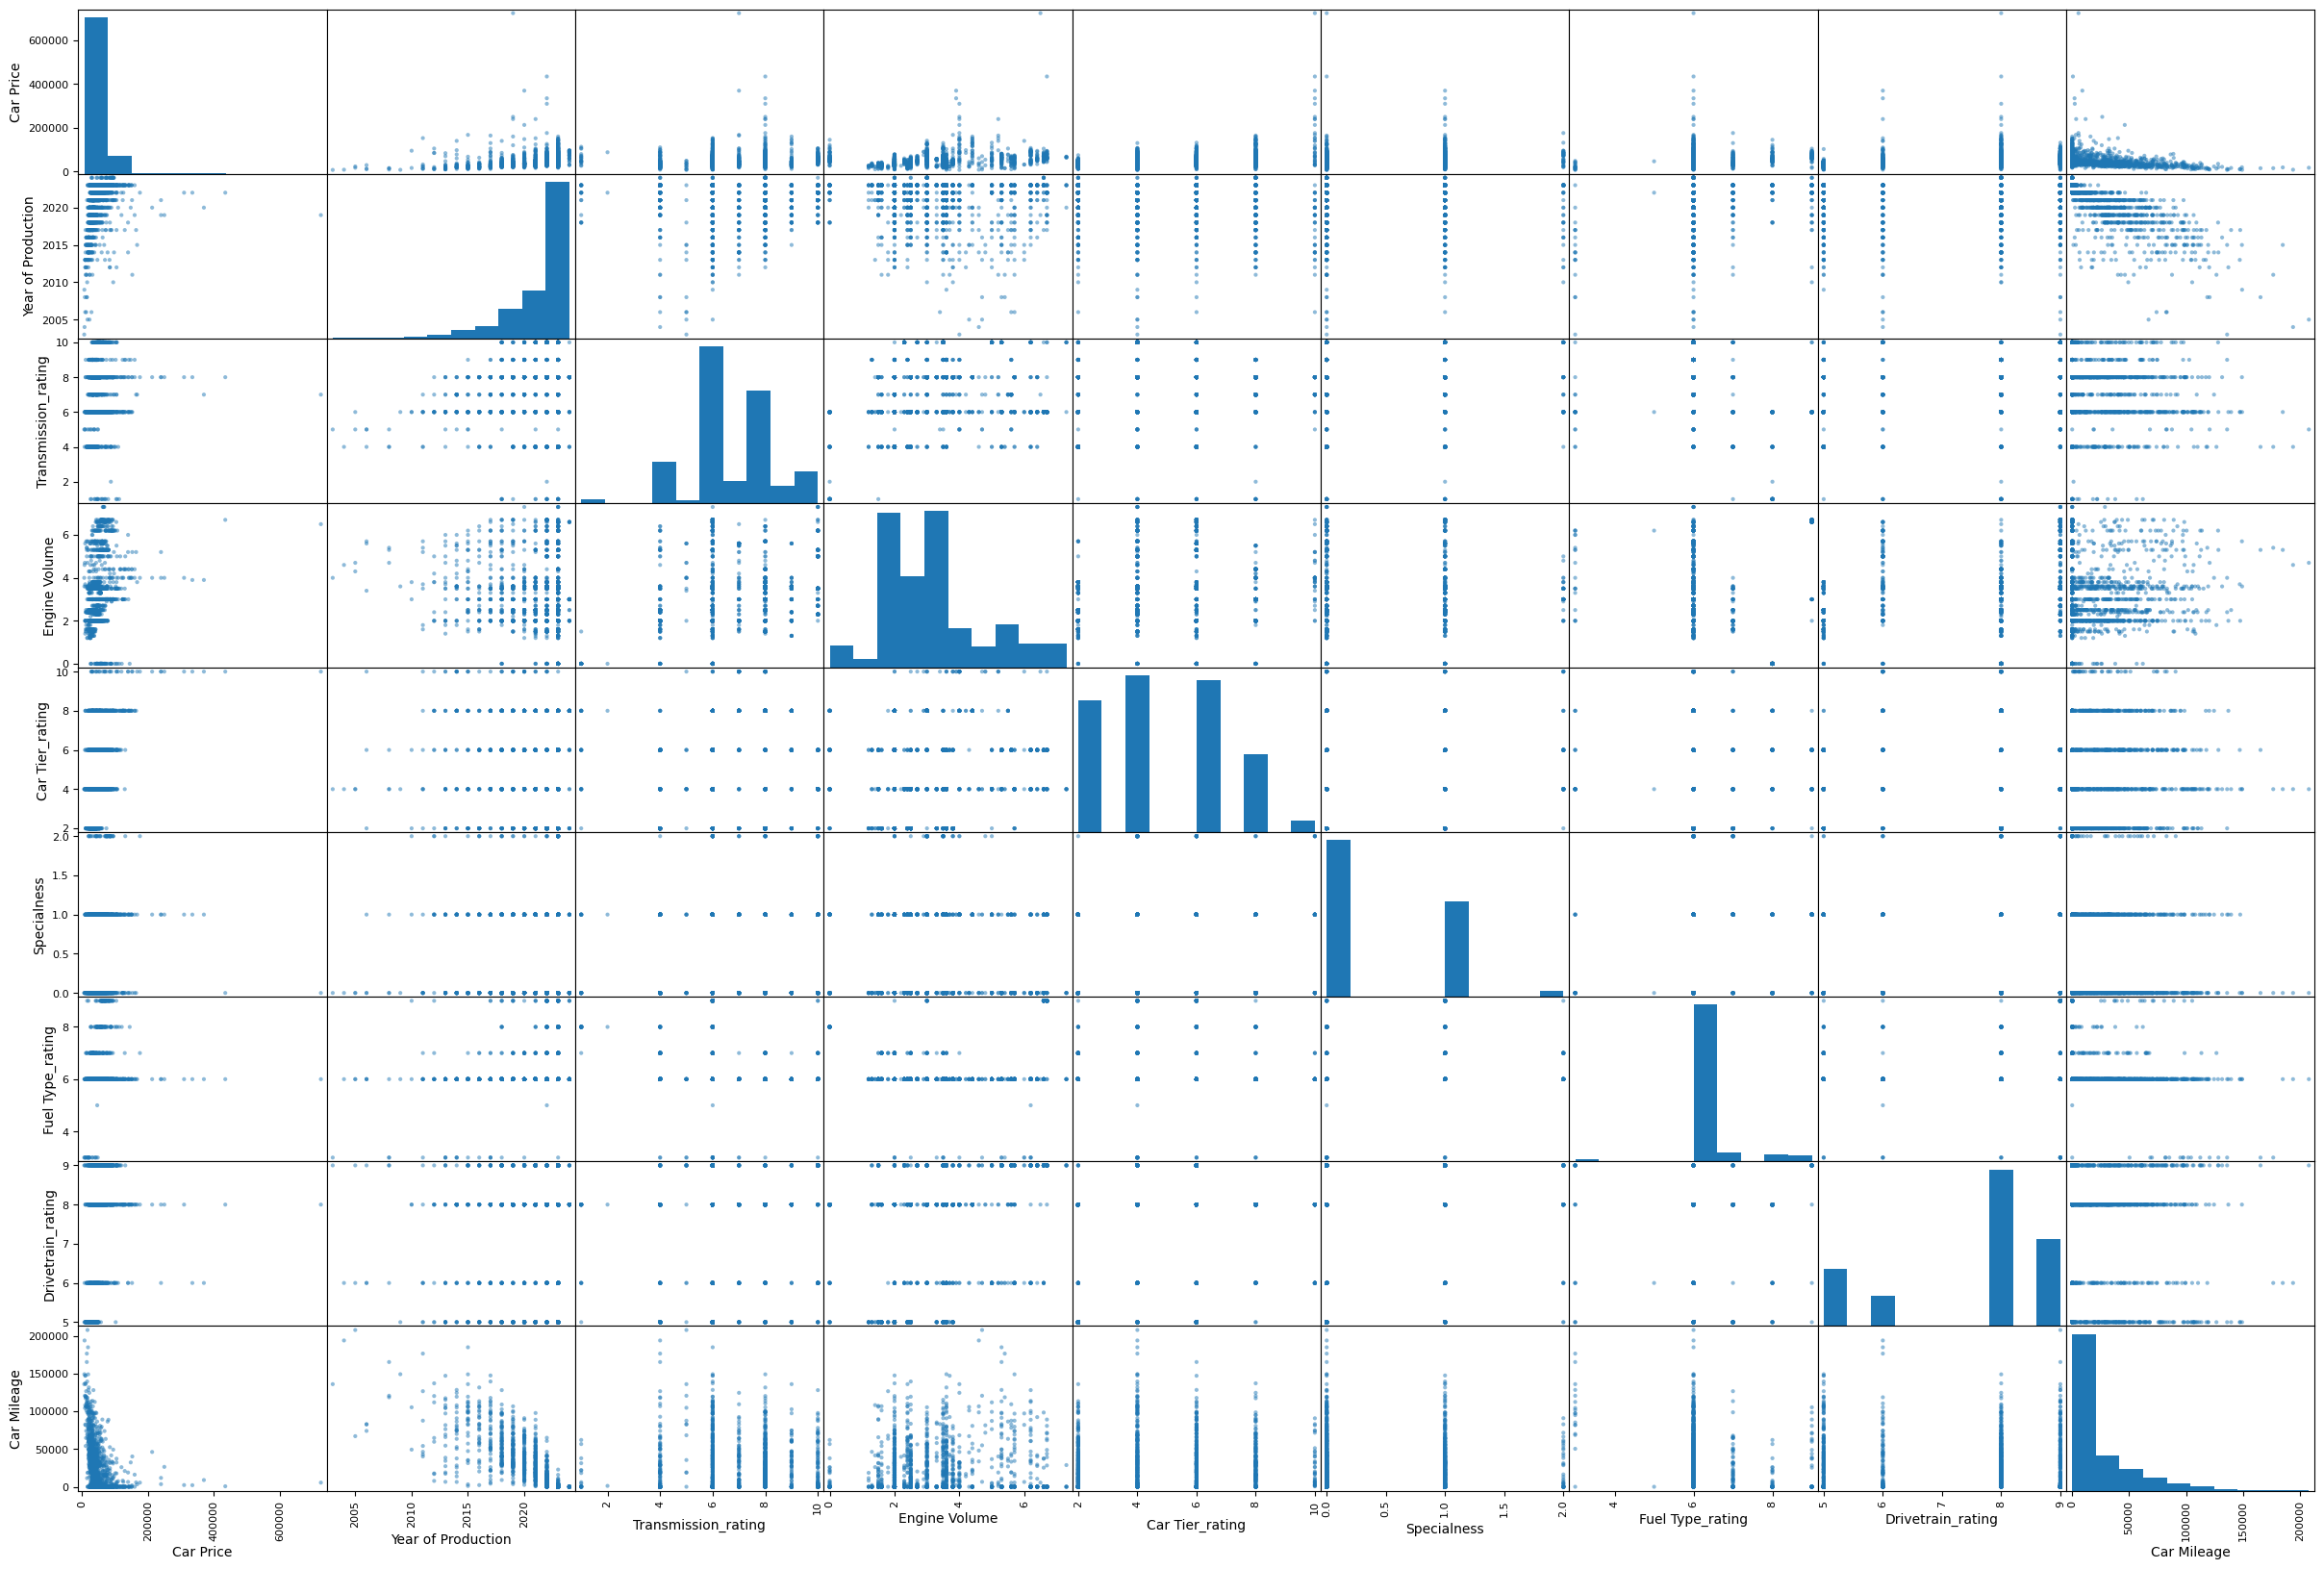

In [87]:
pd.plotting.scatter_matrix(pd.DataFrame(data=df, columns=['Car Price','Year of Production','Transmission_rating','Engine Volume','Car Tier_rating','Specialness','Fuel Type_rating','Drivetrain_rating','Car Mileage']), figsize=(30, 20))
plt.show

Returning to my hypothesis, let's analyse key aspects of the plot:

1) Mileage is the most influential factor affecting car price. As mileage increases, the price decreases significantly, showing its critical importance.
2) The year of production is the second most important factor. Newer cars (with a higher year of production) are generally more expensive, highlighting the strong influence of this parameter.
3) Car Tier ranks third in importance, slightly behind the year of production. Its effect on price is reflected through distinct clusters corresponding to different tiers.
4) Engine volume and drivetrain have a reasonable and similar influence on car price. Their impact is noticeable but less significant than mileage, year of production, and car tier.
5) Transmission type, fuel type, and specialness show weak relationships with car price. Among these, Specialness is the least impactful: price remains almost unchanged as specialness increases


Now let's pay attention to correlations to find the truth.

To find out correlations we can use the heatmap graph. 

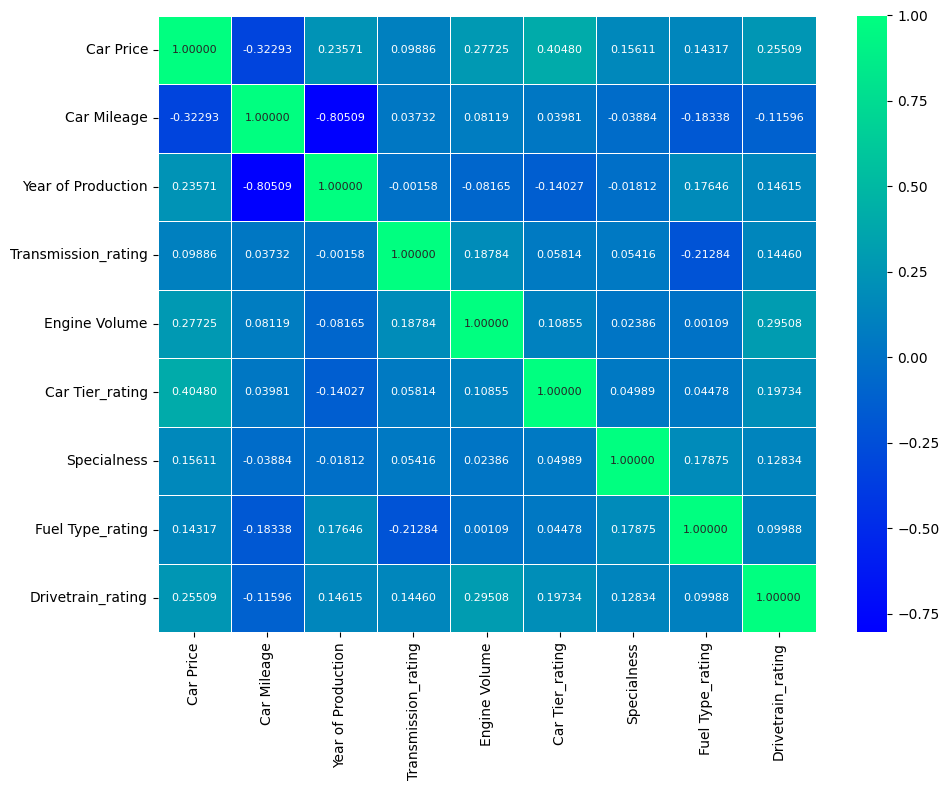

In [88]:
plt.figure(figsize=(10, 8)) 
seaborn.heatmap(
    df[['Car Price', 'Car Mileage', 'Year of Production', 'Transmission_rating', 
        'Engine Volume', 'Car Tier_rating', 'Specialness', 'Fuel Type_rating', 
        'Drivetrain_rating']].corr(), 
    annot=True, 
    fmt='.5f', 
    linewidths=0.5, 
    cmap='winter', 
    annot_kws={"size": 8} 
)
plt.tight_layout()  
plt.savefig('heatmap.png', format='png')
plt.show()

* Price vs. Car Mileage (-0.32293):
There is a strong negative correlation between price and mileage. This indicates that the price of a car decreases with increase of mileage
* Price vs. Year of Production (0.23571):
There is a positive correlation between the year of production and car price. Newer cars tend to have higher prices, but the correlation is slightly weaker than that of mileage. 
* Price vs. Transmission_rating (0.09886):
THere is a very weak positive correlation, meaning it has minimal impact on car price. 
* Price vs. Engine Volume (0.27725):
 There is a considerable positive correlation. 
 * Price vs. Car Tier_rating (0.40480):
 There is the most significant positive correlation between price and Car Tier. A lower-tier rating corresponds to a higher price drop, suggesting car tier is very important factor influencing price
* Price vs Specialness (0.15611):
There is a weak but still noticeable positive correlation of specialness and price. 
* Price vs Fuel Type_rating (0.14317):
There is weak positive correlation between Fuel Type and Price showing that it's influence is practically negligible
* Price vs Drivetrain_rating (0.25509):
THere is a strong positive correlation between price and drivetrain. It is an important factor

Contrary to my expectations, the analysis proves that Car Tier(brand) plays a more crucial role than mileage and year of production in influencing the price. Furthermore, Engine Volume is more valuable than we expected slightly surpassing both Year of Production and Drivetrain. A new discovery for me is that I expected Specialness to be the least impactful among Fuel Type and Transmission but it turned out to be the most impactful. 

Now lets create a machine learning model that will allow us to calculate the predicted price of a car from such parameters as Car Mileage', 'Year of Production', 'Transmission_rating', 'Engine Volume', 'Car Tier_rating', 'Specialness', 'Fuel Type_rating', 'Drivetrain_rating'

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Car Mileage', 'Year of Production', 'Transmission_rating', 
        'Engine Volume', 'Car Tier_rating', 'Specialness', 
        'Fuel Type_rating', 'Drivetrain_rating']]
y = df['Car Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

def predict_car_price(features):
    features_array = features.values if isinstance(features, pd.DataFrame) else np.array(features).reshape(1, -1)
    return model.predict(features_array)[0]

example_features = [3, 2023, 4, 2.0, 4, 0, 6, 6] 
predicted_price = predict_car_price(example_features)
print(f"Predicted Price: {predicted_price}")

Root Mean Squared Error: 14957.973444356103
Predicted Price: 38099.698333333334


Now lets create a new column in our dataset that will show the expected price of a car 

In [90]:
import warnings
warnings.filterwarnings("ignore")
df['Predicted Car Price'] = df.apply(lambda row: predict_car_price(
    row[['Car Mileage', 'Year of Production', 'Transmission_rating', 
         'Engine Volume', 'Car Tier_rating', 'Specialness', 
         'Fuel Type_rating', 'Drivetrain_rating']]), axis=1)
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,Year of Production,Car Brand,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating,Car Tier_rating,Fuel Type_rating,Predicted Car Price
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",2023,Chevrolet,2.7,10k-50k,B-tier,0,6,6,6,6,42549.936708
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",2023,GMC,5.3,50k-100k,C-tier,0,9,6,4,6,77195.069762
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9,67514.222438
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,Chevrolet,6.6,50k-100k,B-tier,1,9,6,6,9,67514.222438
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,2023,Chevrolet,1.3,10k-50k,B-tier,0,5,6,6,6,27221.587500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,2008,Chevrolet,5.3,10k-50k,B-tier,0,9,4,6,3,14884.740000
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,2011,Ford,5.4,10k-50k,C-tier,0,6,4,4,3,14508.790000
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,2015,GMC,5.3,10k-50k,C-tier,0,6,6,4,6,17786.020000
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,2004,Ford,4.6,0-10k,C-tier,0,6,4,4,6,14685.560000


Now lets create a column that will show the difference between predicted car price and actual car price in %

In [91]:
df['Difference'] = abs((df['Predicted Car Price']-df['Car Price'])/df['Car Price']*100)
df

,Car Name,Car Price,Car Mileage,Exterior Color,Interior Color,Drivetrain,Fuel Type,Transmission,Engine,Year of Production,...,Engine Volume,Price Range,Car Tier,Specialness,Drivetrain_rating,Transmission_rating,Car Tier_rating,Fuel Type_rating,Predicted Car Price,Difference
0,Chevrolet Colorado LT,37450.0,0.0,Summit White,Jet Black,Rear-wheel Drive,Gasoline,Automatic,"2.7L I-4 gasoline direct injection, DOHC, vari...",2023,...,2.7,10k-50k,B-tier,0,6,6,6,6,42549.936708,13.617989
1,GMC Yukon XL SLT,80235.0,0.0,Onyx Black,Jet Black,Four-wheel Drive,Gasoline,Automatic,"EcoTec3 5.3L V-8 gasoline direct injection, va...",2023,...,5.3,50k-100k,C-tier,0,9,6,4,6,77195.069762,3.788783
2,Chevrolet Silverado 2500 LT,68560.0,0.0,Summit White,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,...,6.6,50k-100k,B-tier,1,9,6,6,9,67514.222438,1.525347
3,Chevrolet Silverado 2500 LT,68560.0,0.0,Black,Jet Black,Four-wheel Drive,Diesel,Automatic,Turbocharged Diesel V8 6.6L/403,2023,...,6.6,50k-100k,B-tier,1,9,6,6,9,67514.222438,1.525347
4,Chevrolet Trailblazer LT,26710.0,0.0,Mosaic Black Metallic,Jet Black,Front-wheel Drive,Gasoline,Automatic,1.3L I3 12V GDI DOHC Turbo,2023,...,1.3,10k-50k,B-tier,0,5,6,6,6,27221.587500,1.915341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,Chevrolet Tahoe LTZ,14799.0,165199.0,White,Gray,Four-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.3L V8 16V MPFI OHV Flexible Fuel,2008,...,5.3,10k-50k,B-tier,0,9,4,6,3,14884.740000,0.579363
1738,Ford E250 Cargo,14900.0,176367.0,Oxford White,Gray,Rear-wheel Drive,E85 Flex Fuel,4-Speed Automatic,5.4L V8 16V MPFI SOHC Flexible Fuel,2011,...,5.4,10k-50k,C-tier,0,6,4,4,3,14508.790000,2.625570
1739,GMC Sierra 1500 SLT,18495.0,184734.0,Summit White,Cocoa / Dune,Rear-wheel Drive,Gasoline,6-Speed Automatic,5.3L V8 16V GDI OHV,2015,...,5.3,10k-50k,C-tier,0,6,6,4,6,17786.020000,3.833360
1740,Ford F-150 XLT SuperCrew,7995.0,193750.0,Gold,Tan,Rear-wheel Drive,Gasoline,4-Speed Automatic,4.6L V8 16V MPFI SOHC,2004,...,4.6,0-10k,C-tier,0,6,4,4,6,14685.560000,83.684303


Lets find the medium percentage of difference between predicted car price and real car price

In [92]:
print('The medium percentage of difference is equal to ',df['Difference'].mean())

The medium percentage of difference is equal to  7.37126484679139


The mean difference is approximately 7.3%, so we can say that the model is working!
Now we can calculate an approximate price of car if we have necessary parameters:

In [93]:
import re
print('Enter Car Mileage:')
Car_Mileage = float(input())
print('Enter Year of Production:')
Year_of_Production = float(input())
df['Transmission_rating'] = df['Transmission']
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'(\d+)-Speed.*', r'\1', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'(\d+)-Spd.*', r'\1', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].str.replace(r'Automatic', '6', regex=True)
df['Transmission_rating'] = df['Transmission_rating'].where(df['Transmission_rating'].str.match(r'^\d+$'), 4)
df['Transmission_rating'] = df['Transmission_rating'].astype(int)
df
print('Enter your transmission type:')
transmission_input = str(input())
transmission_rating = transmission_input
transmission_rating = re.sub(r'(\d+)-Speed.*', r'\1', transmission_rating)
transmission_rating = re.sub(r'(\d+)-Spd.*', r'\1', transmission_rating)
transmission_rating = re.sub(r'Automatic', '6', transmission_rating)
transmission_rating = transmission_rating if re.match(r'^\d+$', transmission_rating) else '4'
transmission_rating = int(transmission_rating)

print("Enter the volume of your car's engine:")
Engine_Volume = float(input())
print('Enter the Car Brand:')
Car_tier_rating = str(input())
if Car_tier_rating in ['Ferrari', 'Lamborghini', 'McLaren', 'Bentley','Porsche','Rolls-Royce','Aston']:
        Car_tier_rating = 10
elif Car_tier_rating in ['BMW', 'Mercedes-Benz', 'Audi','Rivian','Lotus','Maserati']:
        Car_tier_rating = 9
elif Car_tier_rating in ['Volvo', 'Chevrolet', 'Cadillac', 'Land', 'Tesla','Jaguar', 'INFINITI','RAM','Lincoln','Nissan']:
        Car_tier_rating = 6
elif Car_tier_rating in ['Ford', 'Mazda','Genesis','Toyota','GMC','Jeep','Acura','Lexus','Dodge','Alfa']:
        Car_tier_rating = 4
elif Car_tier_rating in [ 'Buick', 'Chrysler', 'MINI', 'Mitsubishi', 'Scion', 'Subaru','Hyundai','Kia','Honda','Volkswagen']:
        Car_tier_rating = 2
else:
        Car_tier_rating = 5
print('Enter the full car name:')
s_1 = str(input()).split()
special_name_keywords = ['Premium', 'Luxury', 'Sport', 'Grand', 'Edition', 'Turbo', 'Hybrid', 'Electric', 'Wagon', 'Limited','Touring','Ti']
special_engine_keywords = ['Supercharged', 'Twin Turbo', 'Turbo Diesel','Turbocharged']
print('Enter the full engine characteristics:')
s_2 = str(input()).split()
Specialness = 0
if set(s_1).intersection(special_name_keywords):
        Specialness += 1
if set(s_2).intersection(special_engine_keywords):
        Specialness+=1
print('Enter the Fuel Type of your car:')
Fuel_Type_rating = str(input())
if Fuel_Type_rating == 'Gasoline':
        Fuel_Type_rating = 6
elif Fuel_Type_rating == 'Diesel':
        Fuel_Type_rating = 9
elif Fuel_Type_rating == 'Electric':
        Fuel_Type_rating = 8
elif Fuel_Type_rating == 'E85 Flex Fuel':
        Fuel_Type_rating = 3
elif Fuel_Type_rating == 'Hybrid':
        Fuel_Type_rating = 7
elif Fuel_Type_rating == 'Flexible Fuel':
        Fuel_Type_rating = 5
else:
       Fuel_Type_rating = 4
print('Enter the Drivetrain of your car(note that you should write 4WD instead of Four-wheel Drive and analogically for AWD,RWD,FWD):')
Drivetrain_rating = str(input())
if Drivetrain_rating == 'AWD':
        Drivetrain_rating = 8
elif Drivetrain_rating =='4WD':
        Drivetrain_rating = 9
elif Drivetrain_rating == 'FWD':
        Drivetrain_rating = 5
elif Drivetrain_rating == 'RWD':
        Drivetrain_rating = 6
else:
        Drivetrain_rating = 4
stats = [Car_Mileage, Year_of_Production, transmission_rating,Engine_Volume,Car_tier_rating,Specialness,Fuel_Type_rating,Drivetrain_rating]
print(predict_car_price(stats))

Enter Car Mileage:
Enter Year of Production:
Enter your transmission type:
Enter the volume of your car's engine:
Enter the Car Brand:
Enter the full car name:
Enter the full engine characteristics:
Enter the Fuel Type of your car:
Enter the Drivetrain of your car(note that you should write 4WD,AWD,RWD,FWD):
61035.535


In [94]:
df.to_pickle('df.pkl')